# Introduction

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

## Metadata

Bank client data: Age (numeric) Job : type of job (categorical: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown') Marital : marital status (categorical: 'divorced', 'married', 'single', 'unknown' ; note: 'divorced' means divorced or widowed) Education (categorical: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown') Default: has credit in default? (categorical: 'no', 'yes', 'unknown') Housing: has housing loan? (categorical: 'no', 'yes', 'unknown') Loan: has personal loan? (categorical: 'no', 'yes', 'unknown')
Related with the last contact of the current campaign: Contact: contact communication type (categorical: 'cellular','telephone') Month: last contact month of year (categorical: 'jan', 'feb', 'mar', …, 'nov', 'dec') Day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri') Duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
Other attributes: Campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact) Pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted) Previous: number of contacts performed before this campaign and for this client (numeric) Poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
Social and economic context attributes Emp.var.rate: employment variation rate - quarterly indicator (numeric) Cons.price.idx: consumer price index - monthly indicator (numeric) Cons.conf.idx: consumer confidence index - monthly indicator (numeric) Euribor3m: euribor 3 month rate - daily indicator (numeric) Nr.employed: number of employees - quarterly indicator (numeric)
Output variable (desired target): y - has the client subscribed a term deposit? (binary: 'yes', 'no')

# Import Libraries

In [2]:
!pip install skope-rules
!pip install eli5
!pip install scikit-plot
!pip install shap
!pip install lime
!pip install dalex
!pip install feature-engine

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107719 sha256=22a2692b2fe860dc1d548317633ad90e461a404482b94c714ffae305da768114
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=689c342ea35ab98c8ad16f00358b7d6e9ed1cdeeda7268f74bdc6b7cb052f285
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 8.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ..

In [3]:
import pandas as pd
pd.set_option("display.max_columns",None)

import numpy as np
import seaborn as sns
sns.set(style='whitegrid')
sns.set_palette("bright")
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
palette = {0: 'tab:blue',1: 'tab:orange'}

import plotly.express as px
import pickle
from scipy import stats
from scipy.stats import chi2_contingency

from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import *
from sklearn.feature_selection import RFECV
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold, GridSearchCV, cross_val_score
import sklearn.metrics as metrics

from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold, cross_validate, StratifiedKFold, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import *
from sklearn import svm,tree
from sklearn import ensemble
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc, roc_auc_score, roc_curve, RocCurveDisplay, precision_recall_curve, PrecisionRecallDisplay
from sklearn import model_selection

# load rulefit model
import six
import sys
sys.modules['sklearn.externals.six'] = six
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from yellowbrick.classifier import DiscriminationThreshold

# load scikit-plot modules
import scikitplot as skplt

# load shap package for shap explanation
import shap

# load eli5
import eli5

# load LimeTabularExplainer for LIME method
from lime.lime_tabular import LimeTabularExplainer

# import dalex to explain complex model
import dalex as dx

# for Q-Q plots
import scipy.stats as stats
from feature_engine.outliers import Winsorizer
from scipy.stats import chi2_contingency

import os, random
import tensorflow as tf
from tensorflow import keras

import warnings
warnings.filterwarnings('ignore')

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


# Data Inspection

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset/bank-additional-full.csv',sep=";")

In [10]:
data

age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   73      retired  married  professional.course       no     yes   no   
41184   46  blue-collar  married  professional.course       no      no   no   
41185   56      retired  married    university.degree       no     yes   no   
41186   44   technician  married  professional.course       no      no   no   
41187   74      retired  married  professional.course       no     yes   no   

         contact month day_of_week  duration  campaign  pdays  previous  \
0      telephone   may         mon       261         1    999         0   
1      telephone   may         mon       149         1    999         0   
2      telephone   may         mon       226         1    999         0   
3      telephone   may         mon       151         1    999         0   
4      telephone   may         mon       307         1    999         0   
...          ...   ...         ...       ...       ...    ...       ...   
41183   cellular   nov         fri       334         1    999         0   
41184   cellular   nov         fri       383         1    999         0   
41185   cellular   nov         fri       189         2    999         0   
41186   cellular   nov         fri       442         1    999         0   
41187   cellular   nov         fri       239         3    999         1   

          poutcome  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
0      nonexistent           1.1          93.994          -36.4      4.857   
1      nonexistent           1.1          93.994          -36.4      4.857   
2      nonexistent           1.1          93.994          -36.4      4.857   
3      nonexistent           1.1          93.994          -36.4      4.857   
4      nonexistent           1.1          93.994          -36.4      4.857   
...            ...           ...             ...            ...        ...   
41183  nonexistent          -1.1          94.767          -50.8      1.028   
41184  nonexistent          -1.1          94.767          -50.8      1.028   
41185  nonexistent          -1.1          94.767          -50.8      1.028   
41186  nonexistent          -1.1          94.767          -50.8      1.028   
41187      failure          -1.1          94.767          -50.8      1.028   

       nr.employed    y  
0           5191.0   no  
1           5191.0   no  
2           5191.0   no  
3           5191.0   no  
4           5191.0   no  
...            ...  ...  
41183       4963.6  yes  
41184       4963.6   no  
41185       4963.6   no  
41186       4963.6  yes  
41187       4963.6   no  

[41188 rows x 21 columns]

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [12]:
columns_name =[]
unique_value=[]
# Iterate through the columns
for col in data:
    if data[col].dtype == 'object':
        # If 2 or fewer unique categories
        columns_name.append(str(col))
        unique_value.append(data[col].nunique())
table= pd.DataFrame()
table['Columns'] = columns_name
table['Unique']= unique_value

table=table.sort_values('Unique',ascending=False)
table

Columns  Unique
0           job      12
7         month      10
2     education       8
8   day_of_week       5
1       marital       4
3       default       3
4       housing       3
5          loan       3
9      poutcome       3
6       contact       2
10            y       2

In [13]:
# extracting categorical columns
cat = data.select_dtypes(include = ['object'])

# printing unique values of each column
for col in cat.columns:
    print(f"{col}: \n{cat[col].unique()}\n")

job: 
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']

marital: 
['married' 'single' 'divorced' 'unknown']

education: 
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']

default: 
['no' 'unknown' 'yes']

housing: 
['no' 'yes' 'unknown']

loan: 
['no' 'yes' 'unknown']

contact: 
['telephone' 'cellular']

month: 
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']

day_of_week: 
['mon' 'tue' 'wed' 'thu' 'fri']

poutcome: 
['nonexistent' 'failure' 'success']

y: 
['no' 'yes']



# Data Preparation

### Missing Values Handling

In [14]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [15]:
# Data Profilling
print("="*10,"Data Profilling","="*10)

# Data Shape
print("Data shape :", data.shape)
print("")

# Data Info
print("Data info :")
print(data.info())
print("")

# Data duplication
print("Data duplication :")
print(data.duplicated().sum())
print("")

========== Data Profilling ==========
Data shape : (41188, 21)

Data info :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  

## Droping The Unused Data

In [17]:
#Checking out the categories and their respective counts in each feature
print("Job:",data.job.value_counts(),sep = '\n')
print("-"*40)
print("Marital:",data.marital.value_counts(),sep = '\n')
print("-"*40)
print("Education:",data.education.value_counts(),sep = '\n')
print("-"*40)
print("Default:",data.default.value_counts(),sep = '\n')
print("-"*40)
print("Housing loan:",data.housing.value_counts(),sep = '\n')
print("-"*40)
print("Personal loan:",data.loan.value_counts(),sep = '\n')
print("-"*40)
print("Contact:",data.contact.value_counts(),sep = '\n')
print("-"*40)
print("Month:",data.month.value_counts(),sep = '\n')
print("-"*40)
print("Day:",data.day_of_week.value_counts(),sep = '\n')
print("-"*40)
print("Previous outcome:",data.poutcome.value_counts(),sep = '\n')
print("-"*40)
print("Outcome of this campaign:",data.y.value_counts(),sep = '\n')
print("-"*40)

Job:
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64
----------------------------------------
Marital:
married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64
----------------------------------------
Education:
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64
----------------------------------------
Default:
no         32588
unknown     8597
yes            3
Name: default, dtype: int64
----------------------------------------
Housing loan:
yes        21576
no         18622
unknown      

In [18]:
for column in data.columns:
    data[column].replace('unknown', np.nan, inplace=True)
    data.dropna(inplace=True)

In [19]:
data.reset_index(inplace=True,drop=True)
data

age          job  marital            education default housing loan  \
0       56    housemaid  married             basic.4y      no      no   no   
1       37     services  married          high.school      no     yes   no   
2       40       admin.  married             basic.6y      no      no   no   
3       56     services  married          high.school      no      no  yes   
4       59       admin.  married  professional.course      no      no   no   
...    ...          ...      ...                  ...     ...     ...  ...   
30483   73      retired  married  professional.course      no     yes   no   
30484   46  blue-collar  married  professional.course      no      no   no   
30485   56      retired  married    university.degree      no     yes   no   
30486   44   technician  married  professional.course      no      no   no   
30487   74      retired  married  professional.course      no     yes   no   

         contact month day_of_week  duration  campaign  pdays  previous  \
0      telephone   may         mon       261         1    999         0   
1      telephone   may         mon       226         1    999         0   
2      telephone   may         mon       151         1    999         0   
3      telephone   may         mon       307         1    999         0   
4      telephone   may         mon       139         1    999         0   
...          ...   ...         ...       ...       ...    ...       ...   
30483   cellular   nov         fri       334         1    999         0   
30484   cellular   nov         fri       383         1    999         0   
30485   cellular   nov         fri       189         2    999         0   
30486   cellular   nov         fri       442         1    999         0   
30487   cellular   nov         fri       239         3    999         1   

          poutcome  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
0      nonexistent           1.1          93.994          -36.4      4.857   
1      nonexistent           1.1          93.994          -36.4      4.857   
2      nonexistent           1.1          93.994          -36.4      4.857   
3      nonexistent           1.1          93.994          -36.4      4.857   
4      nonexistent           1.1          93.994          -36.4      4.857   
...            ...           ...             ...            ...        ...   
30483  nonexistent          -1.1          94.767          -50.8      1.028   
30484  nonexistent          -1.1          94.767          -50.8      1.028   
30485  nonexistent          -1.1          94.767          -50.8      1.028   
30486  nonexistent          -1.1          94.767          -50.8      1.028   
30487      failure          -1.1          94.767          -50.8      1.028   

       nr.employed    y  
0           5191.0   no  
1           5191.0   no  
2           5191.0   no  
3           5191.0   no  
4           5191.0   no  
...            ...  ...  
30483       4963.6  yes  
30484       4963.6   no  
30485       4963.6   no  
30486       4963.6  yes  
30487       4963.6   no  

[30488 rows x 21 columns]

In [20]:
data.default.value_counts()

no     30485
yes        3
Name: default, dtype: int64

In [21]:
data.drop("default",inplace=True,axis=1)

# Exploratory Data Analysis

## Frequency Distribution: Categorical Variables

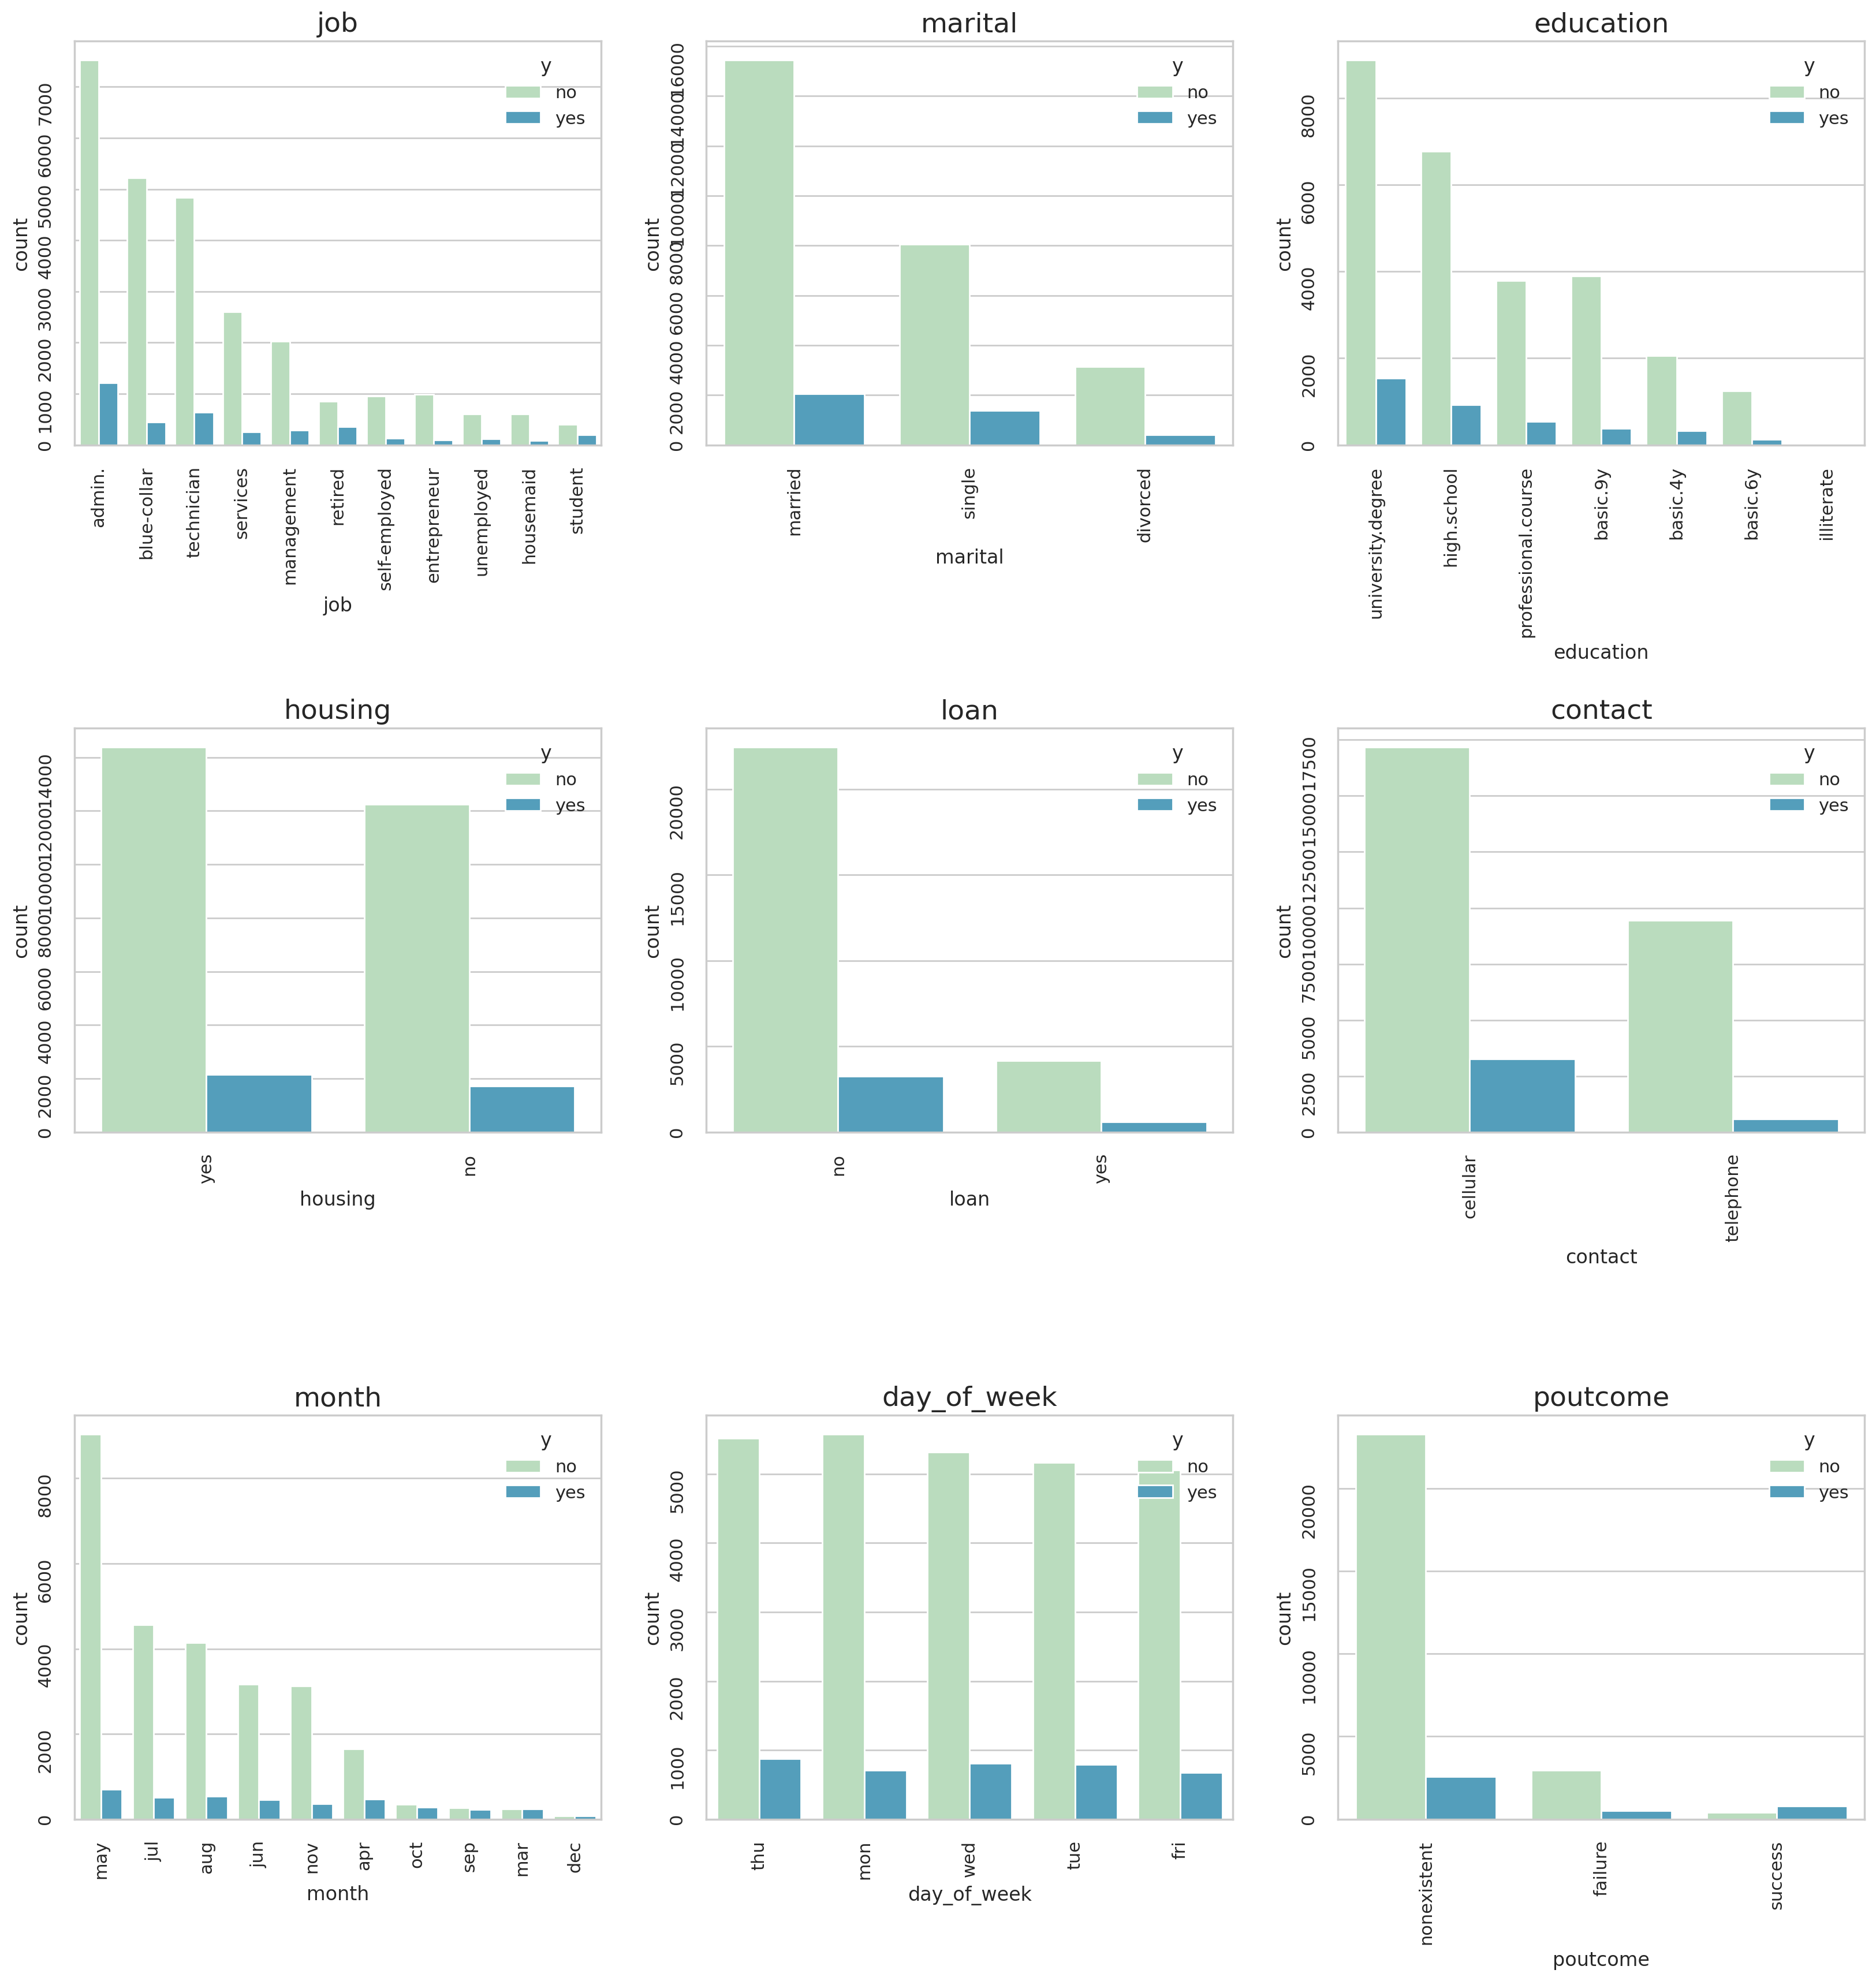

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(3,3, figsize=(20,20))
cat = data.select_dtypes('object').columns.to_list()
cat = cat[:-1]
ax = ax.ravel()
position = 0
for i in cat:

    order = data[i].value_counts().index
    sns.countplot(data=data, x=i, ax=ax[position], hue='y', palette='GnBu', order=order)
    ax[position].tick_params(labelrotation=90)
    ax[position].set_title(i, fontdict={'fontsize':17})

    position += 1

plt.subplots_adjust(hspace=0.7)

plt.show()

## Frequency Distribution: Continuous Variables

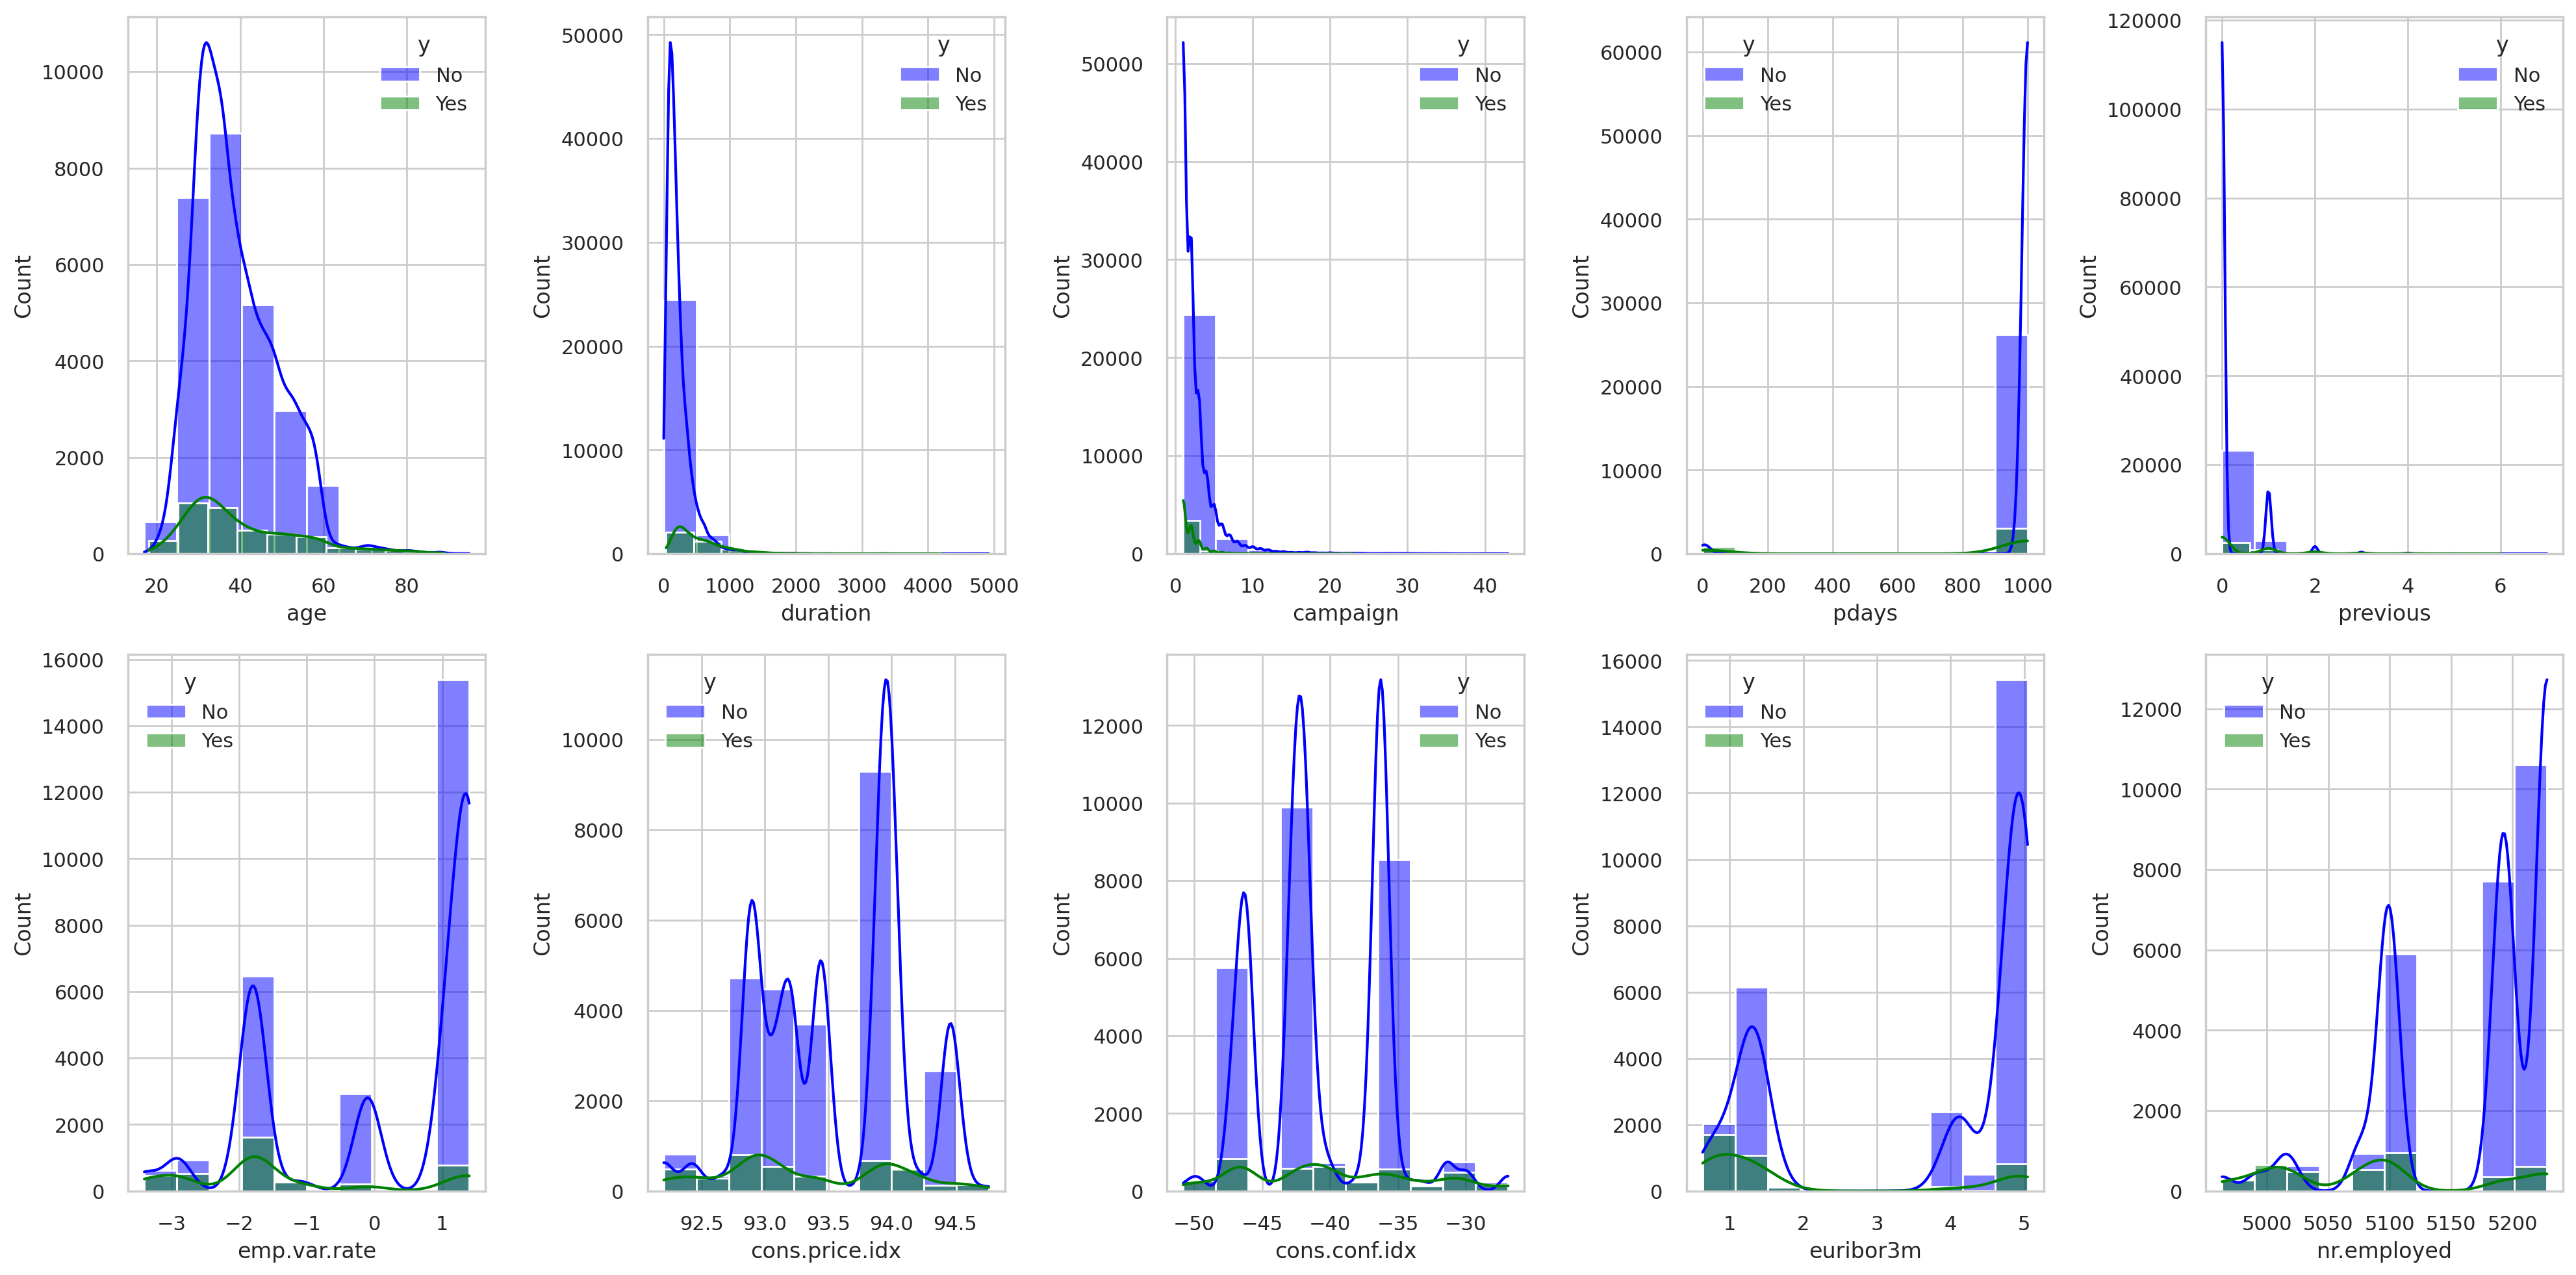

In [34]:
# Get numeric columns and prepare the data
titles = list(data.select_dtypes(np.number))
data_grouped = data.groupby(by='y')

# Check the unique values of the 'y' column
unique_y = data['y'].unique()

# Determine the values for 'No' and 'Yes' groups
group_no = unique_y[0]
group_yes = unique_y[1]

fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(20, 10))
ax_title_pairs = zip(axs.flat, titles)

for ax, title in ax_title_pairs:
    sns.histplot(data_grouped.get_group(group_no)[title], bins=10, ax=ax, label='No', kde=True, color='blue') # Color for 'No' group
    sns.histplot(data_grouped.get_group(group_yes)[title], bins=10, ax=ax, label='Yes', kde=True, color='green') # Color for 'Yes' group
    ax.legend(title='y')

# Remove any extra subplots if you have less than 10 numeric columns.
for unused_ax, _ in ax_title_pairs:
    unused_ax.remove()

fig.tight_layout()
plt.show()

## Box Plots : Outlier Detection

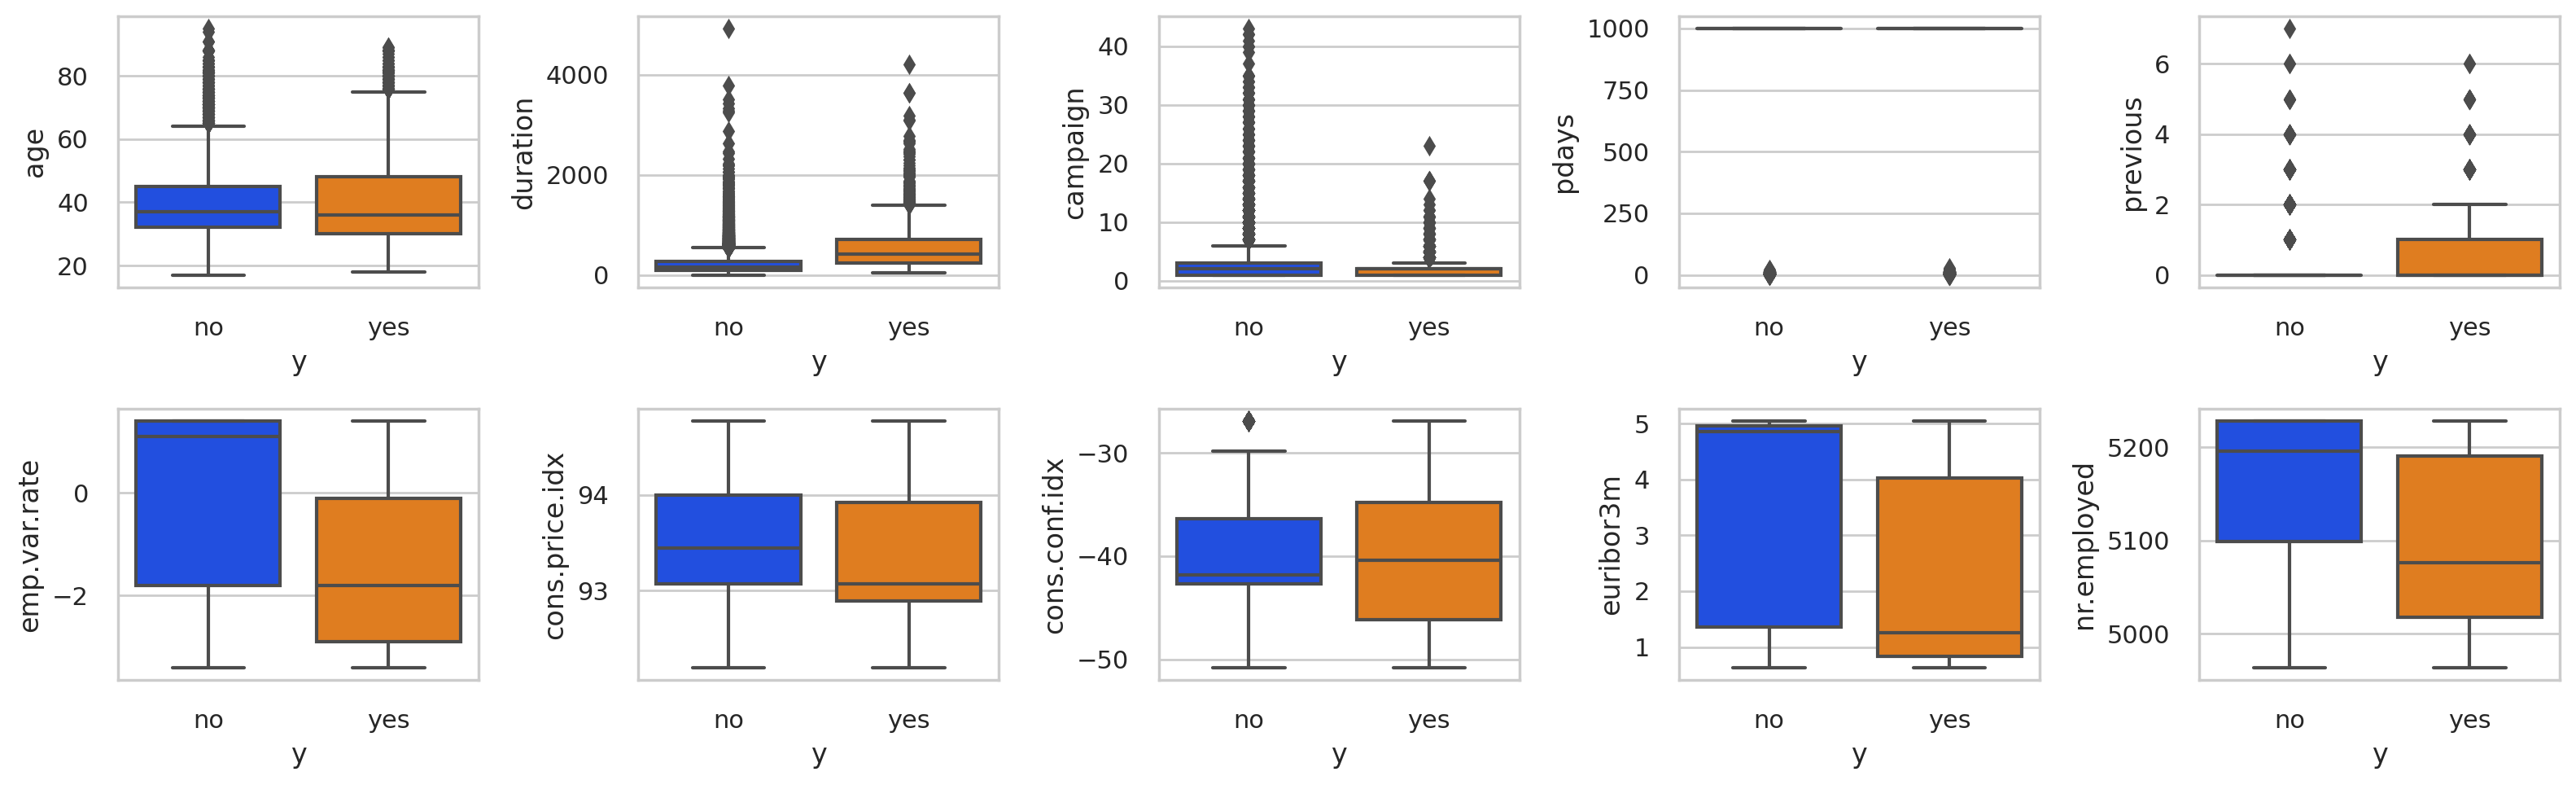

In [36]:
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(16,5))
titles = data.select_dtypes(exclude=['object'])
ax_title_pairs = zip(axs.flat, titles)
for ax, title in ax_title_pairs:
    sns.boxplot(x='y', y=title, data=data, ax=ax)
fig.tight_layout()

In [50]:
# Convert target variable into numeric
data.y = data.y.map({'no':0, 'yes':1}).astype('uint8')

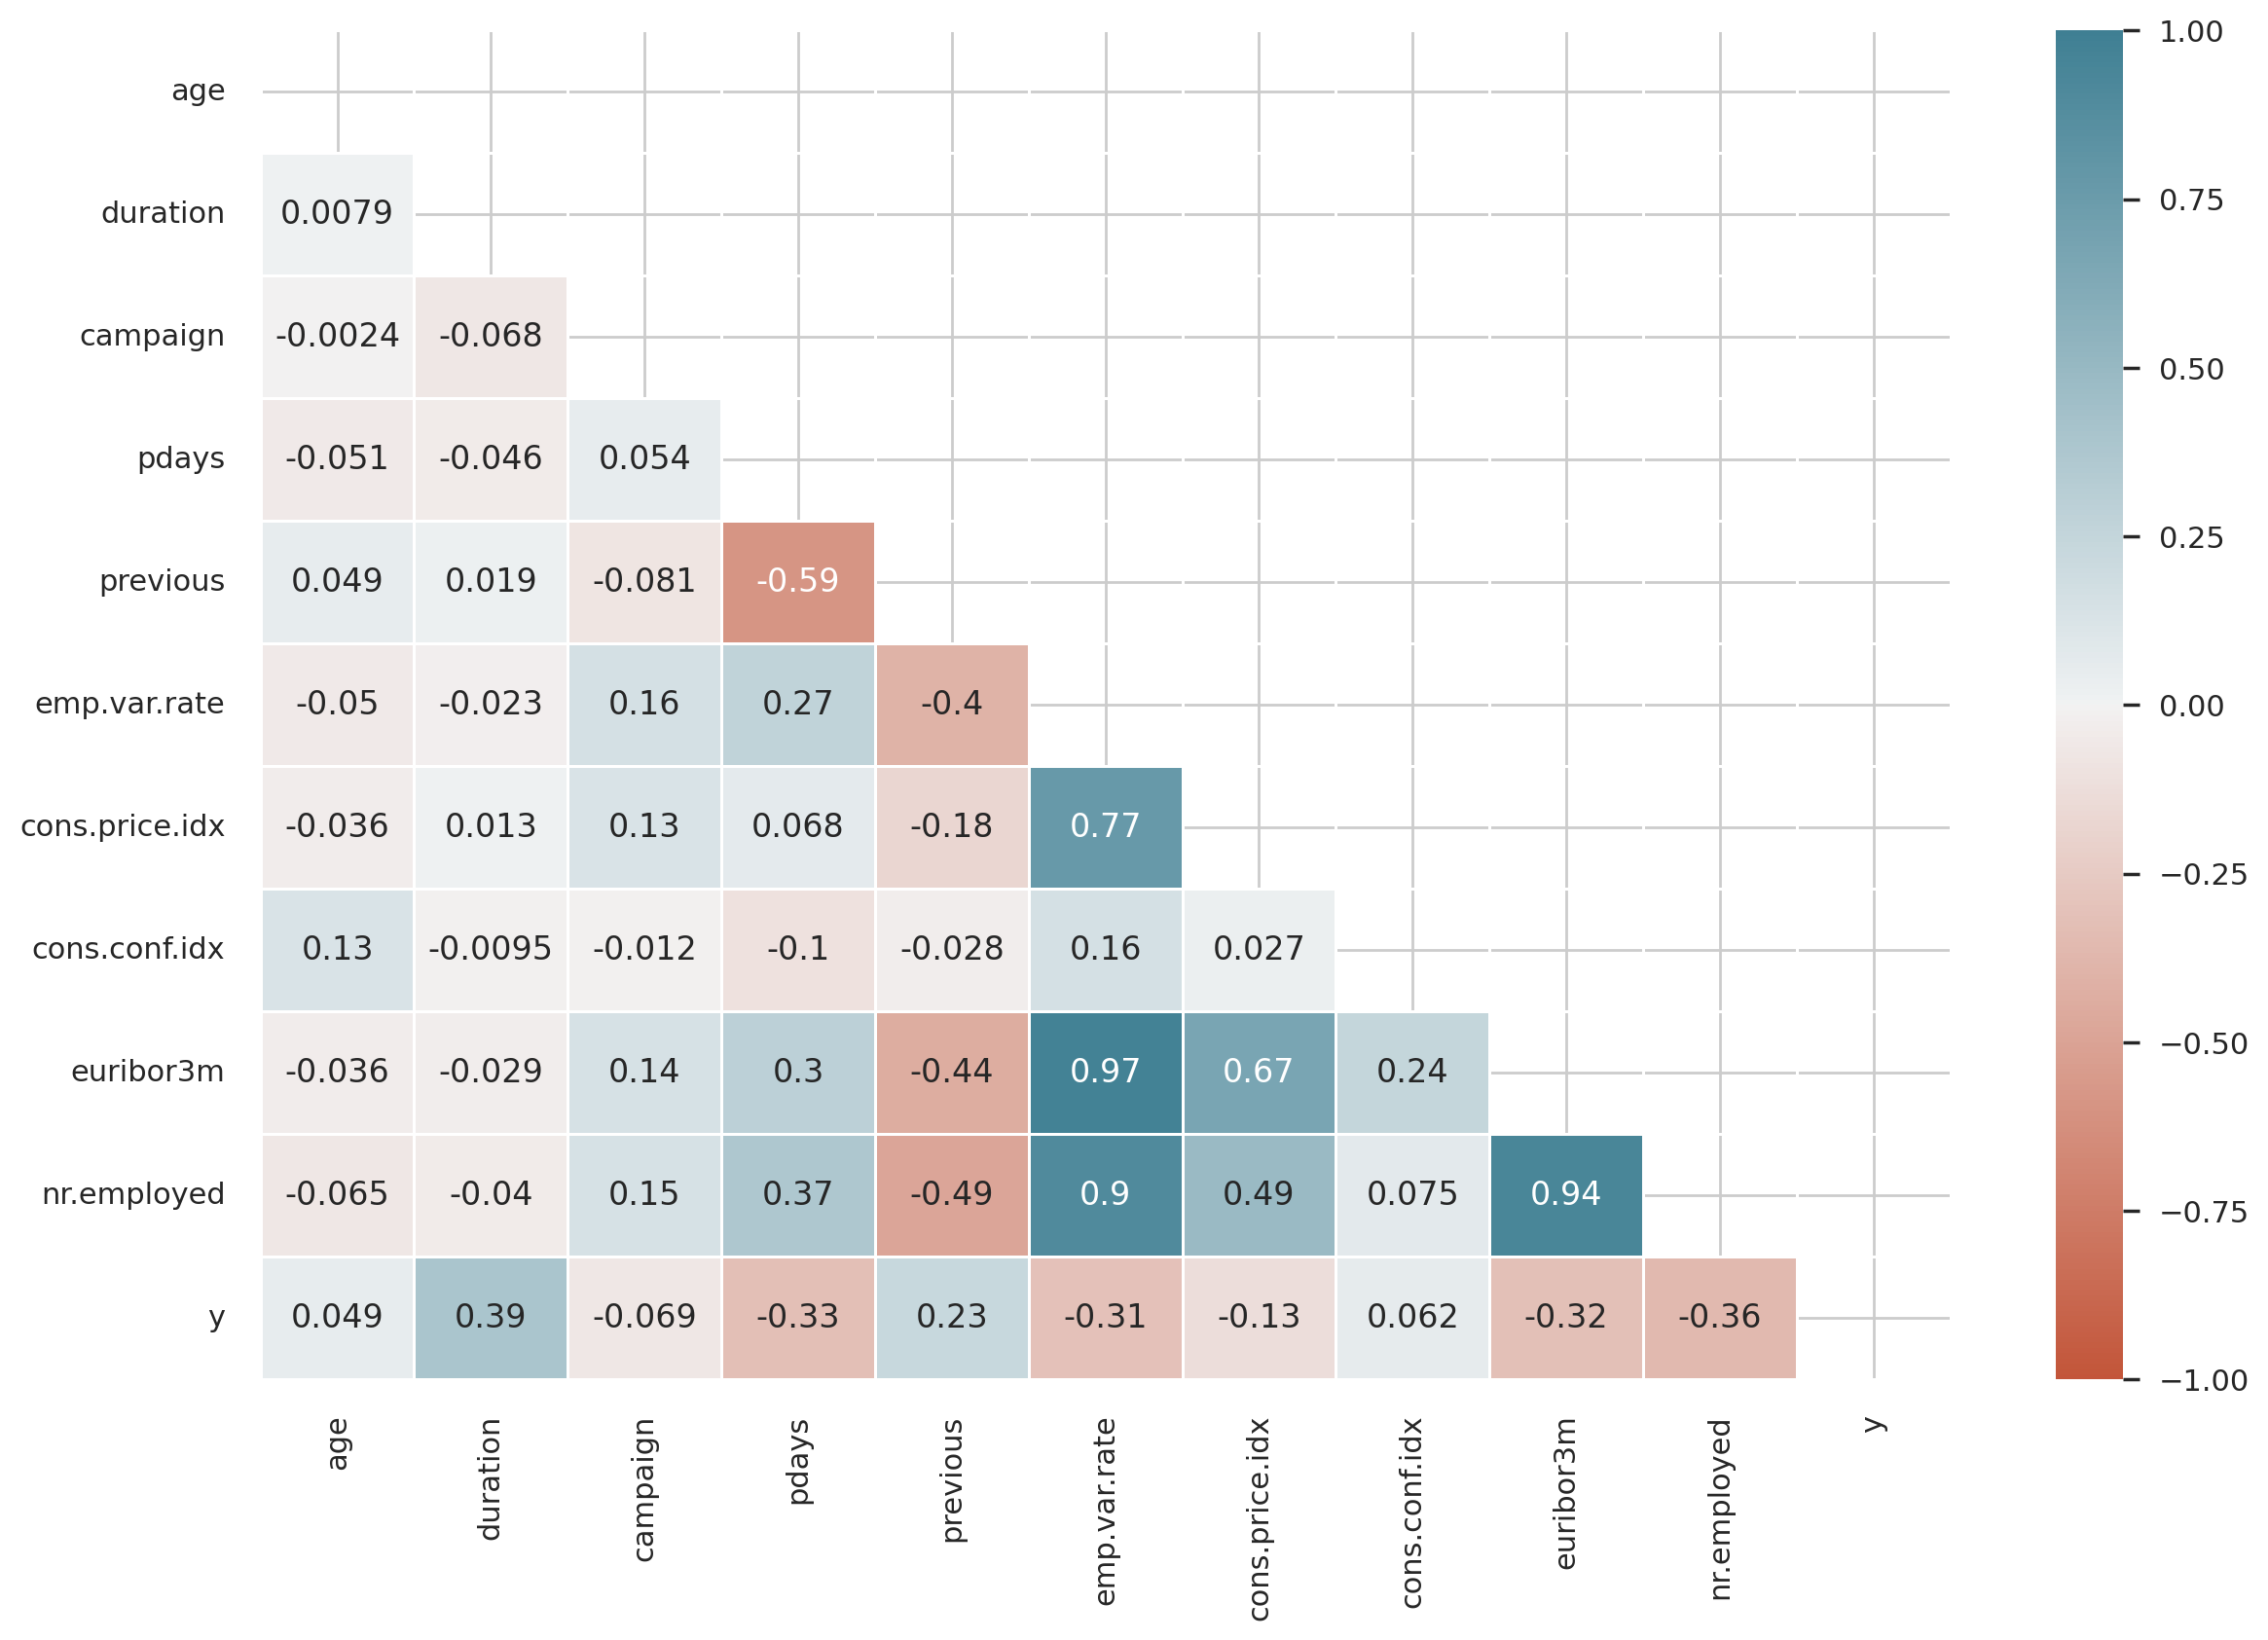

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(data.corr(), dtype=bool))

fig, ax = plt.subplots(figsize=(14, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(data.corr(), mask=mask, vmin=-1, vmax=1, cmap=sns.diverging_palette(20, 220, as_cmap=True),
            annot=True, linewidths=.5, ax=ax)

plt.show()

# Data Pre-Processing

## Data Encoding

In [54]:
data.previous = data.previous.apply(lambda x: 1 if x > 0 else 0).astype('uint8')

In [57]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
objects = ["job","marital","education","housing","loan","contact","month","day_of_week"]
for i in objects:
    data[i] = le.fit_transform(data[i])

## Resampling

In [58]:
# Assign 'TARGET' column to y
y = data['y'].values
# Assign all columns except 'TARGET' to X
X = data.drop(['y'], axis = 1).values

In [59]:
# Check dimension
print('X shape :', X.shape)
print('y shape :', y.shape)

X shape : (30488, 19)
y shape : (30488,)


In [60]:
# split data to train and test data
# with test size is 20% of overall data
# use stratified sampling
# and set RNG to 1000
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.2,
    stratify = y,
    random_state = 42
)

In [61]:
# Make a new dataframe using train & test data
train_data_x = pd.DataFrame(X_train, columns=data.drop(['y'], axis = 1).columns)
train_data_y = pd.DataFrame(y_train, columns=['y'])
train_data = pd.concat([train_data_x, train_data_y], axis=1)

test_data_x = pd.DataFrame(X_test, columns=data.drop(['y'], axis = 1).columns)
test_data_y = pd.DataFrame(y_test, columns=['y'])
test_data = pd.concat([test_data_x, test_data_y], axis=1)

In [62]:
train_data

age job marital education housing loan contact month day_of_week  \
0      46   0       1         3       1    0       0     7           3   
1      32   7       1         3       0    0       1     4           1   
2      56   1       1         2       1    0       0     7           0   
3      54   7       0         3       0    0       1     4           1   
4      41   2       2         3       0    0       0     3           2   
...    ..  ..     ...       ...     ...  ...     ...   ...         ...   
24385  58   4       1         0       0    0       0     7           4   
24386  25   7       2         3       0    0       0     6           2   
24387  43   1       1         0       1    0       1     6           0   
24388  55   9       1         5       0    0       0     7           0   
24389  48   1       1         6       0    0       0     1           1   

      duration campaign pdays previous     poutcome emp.var.rate  \
0          107        3   999        0  nonexistent         -0.1   
1          244        3   999        0  nonexistent          1.4   
2          757        2   999        0  nonexistent         -0.1   
3          113        3   999        0  nonexistent          1.4   
4           67        1   999        0  nonexistent          1.4   
...        ...      ...   ...      ...          ...          ...   
24385       88        2   999        0  nonexistent         -3.4   
24386      646        5   999        0  nonexistent         -1.8   
24387      469        2   999        0  nonexistent          1.1   
24388      182        1   999        1      failure         -0.1   
24389      164        1   999        0  nonexistent          1.4   

      cons.price.idx cons.conf.idx euribor3m nr.employed  y  
0               93.2         -42.0     4.153      5195.8  0  
1             94.465         -41.8      4.96      5228.1  0  
2               93.2         -42.0     4.021      5195.8  0  
3             94.465         -41.8     4.865      5228.1  0  
4             93.918         -42.7     4.962      5228.1  0  
...              ...           ...       ...         ... ..  
24385         92.649         -30.1     0.719      5017.5  0  
24386         92.893         -46.2     1.266      5099.1  1  
24387         93.994         -36.4     4.857      5191.0  0  
24388           93.2         -42.0     4.021      5195.8  0  
24389         93.444         -36.1      4.97      5228.1  0  

[24390 rows x 20 columns]

In [63]:
test_data

age job marital education housing loan contact month day_of_week  \
0     40   0       2         3       1    0       1     6           2   
1     35   9       2         5       1    1       0     1           2   
2     39   0       1         3       0    0       0     3           4   
3     36   9       1         3       0    0       0     0           1   
4     36   0       2         6       1    0       0     9           0   
...   ..  ..     ...       ...     ...  ...     ...   ...         ...   
6093  40   0       0         6       0    0       0     0           4   
6094  34   4       1         6       1    0       0     7           2   
6095  50   0       1         3       1    0       0     6           4   
6096  36   0       1         3       1    0       1     6           0   
6097  31   0       1         6       0    0       1     3           1   

     duration campaign pdays previous     poutcome emp.var.rate  \
0        1047        2   999        0  nonexistent          1.1   
1         133        1   999        0  nonexistent          1.4   
2         184        6   999        0  nonexistent          1.4   
3         207        1   999        0  nonexistent         -1.8   
4         100        2   999        0  nonexistent         -3.4   
...       ...      ...   ...      ...          ...          ...   
6093      143        2   999        0  nonexistent         -1.8   
6094      140        2   999        0  nonexistent         -0.1   
6095      333        1   999        1      failure         -1.8   
6096      143        3   999        0  nonexistent          1.1   
6097      211        2   999        0  nonexistent          1.4   

     cons.price.idx cons.conf.idx euribor3m nr.employed  y  
0            93.994         -36.4      4.86      5191.0  1  
1            93.444         -36.1     4.963      5228.1  0  
2            93.918         -42.7     4.963      5228.1  0  
3            93.075         -47.1     1.405      5099.1  0  
4            92.379         -29.8     0.773      5017.5  1  
...             ...           ...       ...         ... ..  
6093         93.075         -47.1     1.445      5099.1  1  
6094           93.2         -42.0     4.076      5195.8  0  
6095         93.876         -40.0     0.682      5008.7  0  
6096         93.994         -36.4     4.855      5191.0  0  
6097         93.918         -42.7      4.96      5228.1  0  

[6098 rows x 20 columns]

## Normalization

In [64]:
# Check train data
train_data

age job marital education housing loan contact month day_of_week  \
0      46   0       1         3       1    0       0     7           3   
1      32   7       1         3       0    0       1     4           1   
2      56   1       1         2       1    0       0     7           0   
3      54   7       0         3       0    0       1     4           1   
4      41   2       2         3       0    0       0     3           2   
...    ..  ..     ...       ...     ...  ...     ...   ...         ...   
24385  58   4       1         0       0    0       0     7           4   
24386  25   7       2         3       0    0       0     6           2   
24387  43   1       1         0       1    0       1     6           0   
24388  55   9       1         5       0    0       0     7           0   
24389  48   1       1         6       0    0       0     1           1   

      duration campaign pdays previous     poutcome emp.var.rate  \
0          107        3   999        0  nonexistent         -0.1   
1          244        3   999        0  nonexistent          1.4   
2          757        2   999        0  nonexistent         -0.1   
3          113        3   999        0  nonexistent          1.4   
4           67        1   999        0  nonexistent          1.4   
...        ...      ...   ...      ...          ...          ...   
24385       88        2   999        0  nonexistent         -3.4   
24386      646        5   999        0  nonexistent         -1.8   
24387      469        2   999        0  nonexistent          1.1   
24388      182        1   999        1      failure         -0.1   
24389      164        1   999        0  nonexistent          1.4   

      cons.price.idx cons.conf.idx euribor3m nr.employed  y  
0               93.2         -42.0     4.153      5195.8  0  
1             94.465         -41.8      4.96      5228.1  0  
2               93.2         -42.0     4.021      5195.8  0  
3             94.465         -41.8     4.865      5228.1  0  
4             93.918         -42.7     4.962      5228.1  0  
...              ...           ...       ...         ... ..  
24385         92.649         -30.1     0.719      5017.5  0  
24386         92.893         -46.2     1.266      5099.1  1  
24387         93.994         -36.4     4.857      5191.0  0  
24388           93.2         -42.0     4.021      5195.8  0  
24389         93.444         -36.1      4.97      5228.1  0  

[24390 rows x 20 columns]

In [65]:
# Check descriptive stats for train data
train_data.describe()

y
count  24390.000000
mean       0.126568
std        0.332496
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000

In [66]:
# Check test data
test_data

age job marital education housing loan contact month day_of_week  \
0     40   0       2         3       1    0       1     6           2   
1     35   9       2         5       1    1       0     1           2   
2     39   0       1         3       0    0       0     3           4   
3     36   9       1         3       0    0       0     0           1   
4     36   0       2         6       1    0       0     9           0   
...   ..  ..     ...       ...     ...  ...     ...   ...         ...   
6093  40   0       0         6       0    0       0     0           4   
6094  34   4       1         6       1    0       0     7           2   
6095  50   0       1         3       1    0       0     6           4   
6096  36   0       1         3       1    0       1     6           0   
6097  31   0       1         6       0    0       1     3           1   

     duration campaign pdays previous     poutcome emp.var.rate  \
0        1047        2   999        0  nonexistent          1.1   
1         133        1   999        0  nonexistent          1.4   
2         184        6   999        0  nonexistent          1.4   
3         207        1   999        0  nonexistent         -1.8   
4         100        2   999        0  nonexistent         -3.4   
...       ...      ...   ...      ...          ...          ...   
6093      143        2   999        0  nonexistent         -1.8   
6094      140        2   999        0  nonexistent         -0.1   
6095      333        1   999        1      failure         -1.8   
6096      143        3   999        0  nonexistent          1.1   
6097      211        2   999        0  nonexistent          1.4   

     cons.price.idx cons.conf.idx euribor3m nr.employed  y  
0            93.994         -36.4      4.86      5191.0  1  
1            93.444         -36.1     4.963      5228.1  0  
2            93.918         -42.7     4.963      5228.1  0  
3            93.075         -47.1     1.405      5099.1  0  
4            92.379         -29.8     0.773      5017.5  1  
...             ...           ...       ...         ... ..  
6093         93.075         -47.1     1.445      5099.1  1  
6094           93.2         -42.0     4.076      5195.8  0  
6095         93.876         -40.0     0.682      5008.7  0  
6096         93.994         -36.4     4.855      5191.0  0  
6097         93.918         -42.7      4.96      5228.1  0  

[6098 rows x 20 columns]

In [67]:
# Check descriptive stats for test data
test_data.describe()

y
count  6098.000000
mean      0.126599
std       0.332550
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000

In [68]:
# Reseparate independent and dependent feature of the train-test data
X_train = train_data.drop(['y'], axis=1)
y_train = train_data['y']

X_test = test_data.drop(['y'], axis=1)
y_test = test_data['y']

# Data Modeling

In [69]:
#Data Splitting Libraries
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
#Classification Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

In [71]:
X = data.iloc[:,data.columns != 'y']
y = data.y
print("X Columns: ",list(X.columns))

X Columns:  ['age', 'job', 'marital', 'education', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


In [73]:
def ML_training(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

    log_lm = LogisticRegression()
    log_lm.fit(X_train, y_train)
    logy_pred = log_lm.predict(X_test)
    acclr = accuracy_score(y_test, logy_pred)*100
    logquestions = pd.DataFrame({'features': X.columns,'Coef': (log_lm.coef_[0])*100})
    logquestions = logquestions.sort_values(by='Coef', ascending=False)
    ##############################
    dtree=DecisionTreeClassifier()
    dtree.fit(X_train, y_train)
    dtreey_pred = dtree.predict(X_test)
    accdtree = accuracy_score(y_test, dtreey_pred)*100
    dtreequestions = importance(dtree,X)
    ##############################
    rf = RandomForestClassifier(random_state=42)
    rf.fit(X_train, y_train)
    rfy_pred = rf.predict(X_test)
    accrf = accuracy_score(y_test, rfy_pred)*100
    accquestions = importance(rf,X)
    #############################
    gbrt = GradientBoostingClassifier(random_state=42)
    gbrt.fit(X_train, y_train)
    gbrt_pred=gbrt.predict(X_test)
    accgbrt = accuracy_score(y_test, gbrt_pred)*100
    gbrtaccquestions = importance(gbrt,X)
    #############################
    knn = KNeighborsClassifier()
    knn.fit(X_train, y_train)
    knn_pred=knn.predict(X_test)
    knngbrt = accuracy_score(y_test, knn_pred)*100
    #knnaccquestions = importance(knn)

    # Reporting
    print("Logistic Regression Report in test set")
    print(classification_report(y_test, logy_pred))
    print(confusion_matrix(y_test,logy_pred))
    print(logquestions)
    print("------------------------------------------------------")
    print("Decision Tree Report in test set")
    print(classification_report(y_test, dtreey_pred))
    print(confusion_matrix(y_test,dtreey_pred))
    print(dtreequestions)
    print("------------------------------------------------------")
    print("Random Forest Report in test set")
    print(classification_report(y_test, rfy_pred))
    print(confusion_matrix(y_test,rfy_pred))
    print(accquestions)
    print("------------------------------------------------------")
    print("Gradient Boosting in test set")
    print(classification_report(y_test, gbrt_pred))
    print(confusion_matrix(y_test,gbrt_pred))
    print(gbrtaccquestions)
    print("------------------------------------------------------")
    print("K Neighbors in test set")
    print(classification_report(y_test, knn_pred))
    print(confusion_matrix(y_test,knn_pred))
    #print(knnaccquestions)
    print("------------------------------------------------------")

In [74]:
def importance(model,X):
    questions = pd.DataFrame({'features': X.columns,'importance': (model.feature_importances_)*100})
    questions.sort_values(by='importance', ascending=False)
    questions = questions.sort_values(by='importance', ascending=False)
    return questions

In [76]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}  # store each encoder for potential use later

for column in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le  # store the encoder

ML_training(X, y)

Logistic Regression Report in test set
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      5350
           1       0.65      0.42      0.51       748

    accuracy                           0.90      6098
   macro avg       0.79      0.70      0.73      6098
weighted avg       0.89      0.90      0.89      6098

[[5183  167]
 [ 432  316]]
          features       Coef
15  cons.price.idx  22.452027
3        education   7.540723
16   cons.conf.idx   3.508810
2          marital   3.208504
8      day_of_week   2.742547
13        poutcome   1.432386
0              age   0.518110
4          housing   0.510736
9         duration   0.457138
12        previous   0.021240
11           pdays  -0.150337
5             loan  -0.373099
18     nr.employed  -0.413246
1              job  -0.499272
6          contact  -4.119176
10        campaign  -6.678895
7            month  -6.975907
14    emp.var.rate -26.530298
17       euribor3m -28.271700
-------

In [77]:
print("Unbalanced Data shape", len(datata))
datano = data[data.y == 0]
datayes = data[data.y == 1]
balanced_data = pd.concat([datano.sample(len(datayes), random_state=5), datayes])
print("Balanced data shape:", len(balanced_data))

Unbalanced Data shape 30488
Balanced data shape: 7718


In [78]:
balanced_data.y.value_counts()

0    3859
1    3859
Name: y, dtype: int64

In [79]:
balanced_data.reset_index(inplace=True,drop=True)

In [80]:
X_balanced = balanced_data.iloc[:,balanced_data.columns != 'y']
y_balanced = balanced_data.y
print("X Columns: ",list(X_balanced.columns))

X Columns:  ['age', 'job', 'marital', 'education', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


In [82]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}  # Store each encoder for potential use later.

for column in X_balanced.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X_balanced[column] = le.fit_transform(X_balanced[column])
    label_encoders[column] = le  # Store the encoder.

ML_training(X_balanced, y_balanced)

Logistic Regression Report in test set
              precision    recall  f1-score   support

           0       0.85      0.84      0.84       766
           1       0.84      0.86      0.85       778

    accuracy                           0.85      1544
   macro avg       0.85      0.85      0.85      1544
weighted avg       0.85      0.85      0.85      1544

[[641 125]
 [111 667]]
          features       Coef
15  cons.price.idx  24.636891
3        education  10.727871
16   cons.conf.idx   5.022687
2          marital   4.095872
8      day_of_week   3.095513
13        poutcome   1.379757
1              job   1.326634
4          housing   1.100643
9         duration   0.645097
0              age   0.402035
5             loan  -0.101373
11           pdays  -0.157989
12        previous  -0.410484
18     nr.employed  -0.416844
6          contact  -4.603481
10        campaign  -7.434597
7            month  -7.528016
17       euribor3m -33.513690
14    emp.var.rate -33.788615
-----------

## Logistics Regression

In [85]:
# Combine the training and test sets
combined = pd.concat([X_train, X_test], axis=0)

# Label encode combined data
for column in combined.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    combined[column] = le.fit_transform(combined[column])
    label_encoders[column] = le

# Split the combined data back into training and test sets
X_train = combined.iloc[:len(X_train)]
X_test = combined.iloc[len(X_train):]

logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

In [86]:
logreg

LogisticRegression(solver='liblinear')

## K-Nearest Neighbors

In [87]:
# Combine the training and test sets
combined = pd.concat([X_train, X_test], axis=0)

# Label encode combined data
for column in combined.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    combined[column] = le.fit_transform(combined[column])
    label_encoders[column] = le

# Split the combined data back into training and test sets
X_train = combined.iloc[:len(X_train)]
X_test = combined.iloc[len(X_train):]

# define k-nearest neighbors classifier
knn = KNeighborsClassifier(n_neighbors = 3)
# fit model to data
knn.fit(X_train, y_train)
# fit prediction model to data
y_pred_knn = knn.predict(X_test)

In [88]:
knn

KNeighborsClassifier(n_neighbors=3)

## Decision Tree

In [89]:
# Combine the training and test sets
combined = pd.concat([X_train, X_test], axis=0)

# Label encode combined data
for column in combined.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    combined[column] = le.fit_transform(combined[column])
    label_encoders[column] = le

# Split the combined data back into training and test sets
X_train = combined.iloc[:len(X_train)]
X_test = combined.iloc[len(X_train):]

# define decision tree classifier
dtree = DecisionTreeClassifier()
# fit model to data
dtree.fit(X_train, y_train)
# fit prediction model to data
y_pred_dtree = dtree.predict(X_test)

In [90]:
dtree

DecisionTreeClassifier()

## Random Forest

In [91]:
# Combine the training and test sets
combined = pd.concat([X_train, X_test], axis=0)

# Label encode combined data
for column in combined.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    combined[column] = le.fit_transform(combined[column])
    label_encoders[column] = le

# Split the combined data back into training and test sets
X_train = combined.iloc[:len(X_train)]
X_test = combined.iloc[len(X_train):]

# define Random Forest classifier
rf = RandomForestClassifier(n_estimators=100)
# fit model to data
rf.fit(X_train, y_train)
# fit prediction model to data
y_pred_rf = rf.predict(X_test)

In [92]:
rf

RandomForestClassifier()

## XGBoost

In [93]:
# Combine the training and test sets
combined = pd.concat([X_train, X_test], axis=0)

# Label encode combined data
for column in combined.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    combined[column] = le.fit_transform(combined[column])
    label_encoders[column] = le

# Split the combined data back into training and test sets
X_train = combined.iloc[:len(X_train)]
X_test = combined.iloc[len(X_train):]

# fit model no training data
xgb = XGBClassifier()
# fit model to data
xgb.fit(X_train, y_train)
# fit prediction model to data
y_pred_xgb = xgb.predict(X_test)

In [94]:
xgb

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

## Modeling Comparasion

In [95]:
models = []
models.append(("Logistic Regression",LogisticRegression(solver='liblinear')))
models.append(("Random Forest",RandomForestClassifier(n_estimators=100)))
models.append(("XGBoost",XGBClassifier()))
models.append(("KNN",KNeighborsClassifier(n_neighbors = 3)))
models.append(("Decision Tree",DecisionTreeClassifier()))

In [96]:
from sklearn import model_selection
recall_results = []
precision_results = []
auc_results = []
f1_score = []
names = []
col = ['ML Mode','ROC-AUC','ROC-AUC Std','Recall','Recall Std','Precision','Precision Std','F1-Score','F1-Score Std']

data_results = pd.DataFrame(columns=col)

i = 0

c = list(set(X_train.columns))

for name,model in models:
    kfold = model_selection.KFold(n_splits=3)
    cv_recall_results = model_selection.cross_val_score(model,X_train[c],y_train,cv=kfold,scoring="recall")

    cv_precision_results = model_selection.cross_val_score(model,X_train[c],y_train,
                                                        cv=kfold,scoring="precision")

    cv_auc_results = model_selection.cross_val_score(model,X_train[c],y_train,
                                                   cv=kfold,scoring="roc_auc")

    cv_f1_results = model_selection.cross_val_score(model,X_train[c],y_train,
                                                   cv=kfold,scoring="f1")
    recall_results.append(cv_recall_results)
    precision_results.append(cv_precision_results)
    auc_results.append(cv_auc_results)
    f1_score.append(cv_f1_results)
    names.append(name)

    data_results.loc[i] = [name,
                        round(cv_auc_results.mean()*100,2),
                        round(cv_auc_results.std()*100,2),
                        round(cv_recall_results.mean()*100,2),
                        round(cv_recall_results.std()*100,2),
                        round(cv_precision_results.mean()*100,2),
                        round(cv_precision_results.std()*100,2),
                        round(cv_f1_results.mean()*100,2),
                        round(cv_f1_results.std()*100,2)]
    i += 1

In [97]:
data_results.sort_values('F1-Score',ascending=False)

ML Mode  ROC-AUC  ROC-AUC Std  Recall  Recall Std  Precision  \
2              XGBoost    94.08         0.18   54.93        2.12      64.52   
1        Random Forest    93.88         0.18   52.50        1.78      65.77   
0  Logistic Regression    92.13         0.31   44.54        1.51      67.44   
3                  KNN    83.43         0.31   48.98        1.22      58.89   
4        Decision Tree    73.52         0.58   54.38        1.84      52.50   

   Precision Std  F1-Score  F1-Score Std  
2           0.23     59.32          1.13  
1           0.88     58.96          0.86  
0           0.83     53.64          1.19  
3           1.19     53.47          0.92  
4           1.21     53.40          0.91

# Model Evaluation

In [99]:
# Logistics Regression Prediction
lr_pred = logreg.predict(X_test)
lr_pred_proba = logreg.predict_proba(X_test)

# KNN Prediction
knn_pred = knn.predict(X_test)
knn_pred_proba = knn.predict_proba(X_test)

# Decision Tree Prediction
dtree_pred = dtree.predict(X_test)
dtree_pred_proba = dtree.predict_proba(X_test)

# Random Forest Prediction
rf_pred = rf.predict(X_test)
rf_pred_proba = rf.predict_proba(X_test)

# XGBoost Prediction
xgb_pred = xgb.predict(X_test)
xgb_pred_proba = xgb.predict_proba(X_test)

### Classification Report

In [100]:
# Logistics Regression Prediction Result
pd.DataFrame(metrics.classification_report(y_test, lr_pred, target_names=['0','1'], output_dict=True))

0           1  accuracy    macro avg  weighted avg
precision     0.919943    0.618596    0.8939     0.769269      0.881792
recall        0.962261    0.422280    0.8939     0.692270      0.893900
f1-score      0.940626    0.501925    0.8939     0.721275      0.885087
support    5326.000000  772.000000    0.8939  6098.000000   6098.000000

In [101]:
# KNN prediction result
pd.DataFrame(metrics.classification_report(y_test, knn_pred, target_names=['0','1'], output_dict=True))

0           1  accuracy    macro avg  weighted avg
precision     0.924390    0.554700  0.885044     0.739545      0.877587
recall        0.945738    0.466321  0.885044     0.706030      0.885044
f1-score      0.934942    0.506685  0.885044     0.720814      0.880725
support    5326.000000  772.000000  0.885044  6098.000000   6098.000000

In [102]:
# Decision Tree prediction result
pd.DataFrame(metrics.classification_report(y_test, dtree_pred, target_names=['0','1'], output_dict=True))

0           1  accuracy    macro avg  weighted avg
precision     0.930804    0.480047  0.867826     0.705426      0.873739
recall        0.916823    0.529793  0.867826     0.723308      0.867826
f1-score      0.923761    0.503695  0.867826     0.713728      0.870581
support    5326.000000  772.000000  0.867826  6098.000000   6098.000000

In [103]:
# random forest prediction result
pd.DataFrame(metrics.classification_report(y_test, rf_pred, target_names=['0','1'], output_dict=True))

0           1  accuracy    macro avg  weighted avg
precision     0.930606    0.630225  0.899967     0.780416      0.892578
recall        0.956816    0.507772  0.899967     0.732294      0.899967
f1-score      0.943529    0.562410  0.899967     0.752970      0.895280
support    5326.000000  772.000000  0.899967  6098.000000   6098.000000

In [104]:
# XGBoost prediction result
pd.DataFrame(metrics.classification_report(y_test, xgb_pred, target_names=['0','1'], output_dict=True))

0           1  accuracy    macro avg  weighted avg
precision     0.937512    0.629898  0.902755     0.783705      0.898568
recall        0.952122    0.562176  0.902755     0.757149      0.902755
f1-score      0.944760    0.594114  0.902755     0.769437      0.900369
support    5326.000000  772.000000  0.902755  6098.000000   6098.000000

### Confusion Matrix

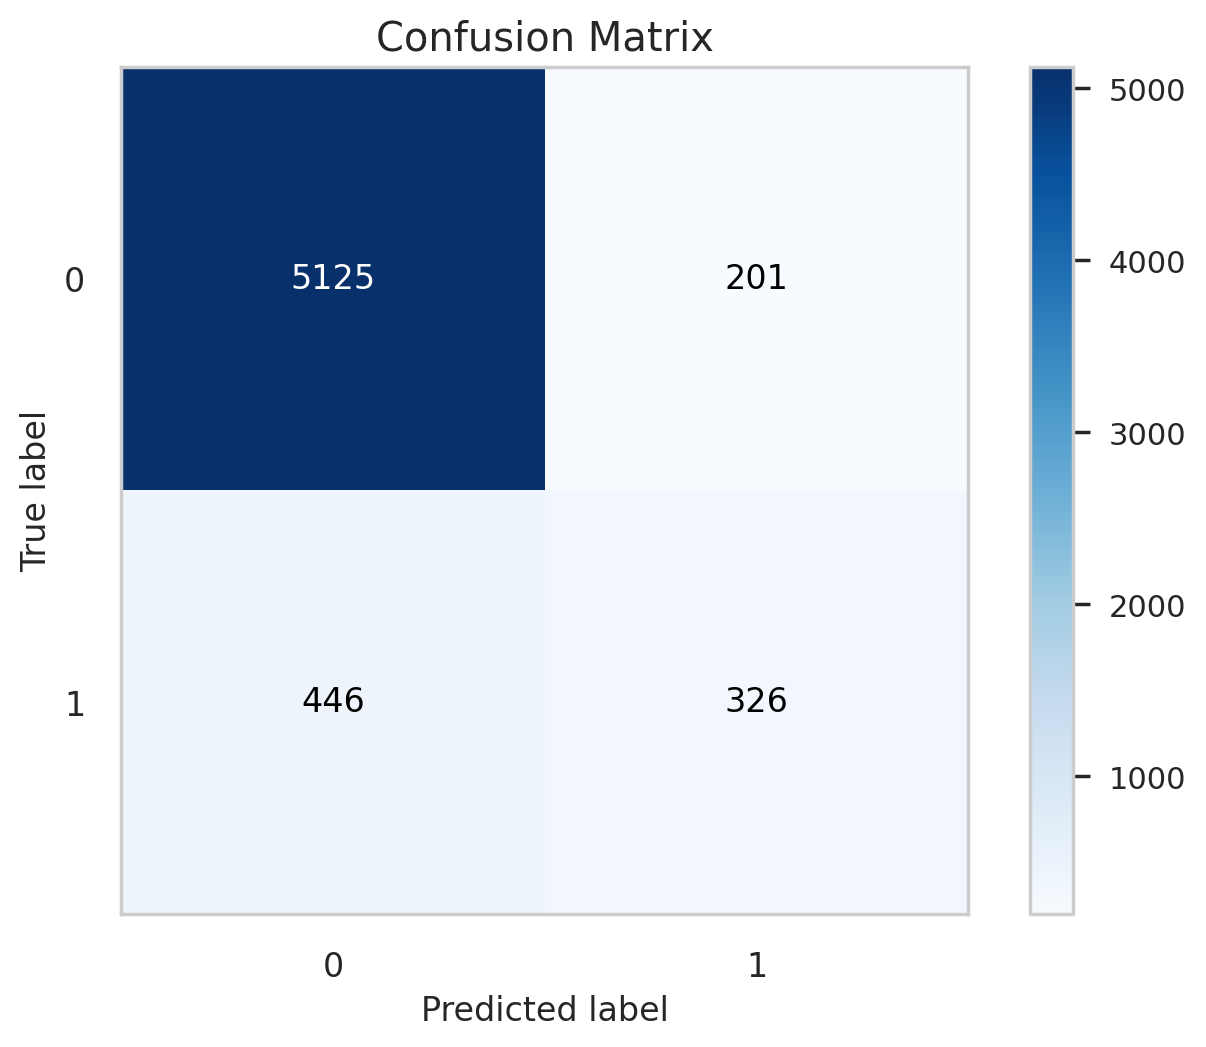

In [105]:
# Logistic Regression result
skplt.metrics.plot_confusion_matrix(y_test, lr_pred);

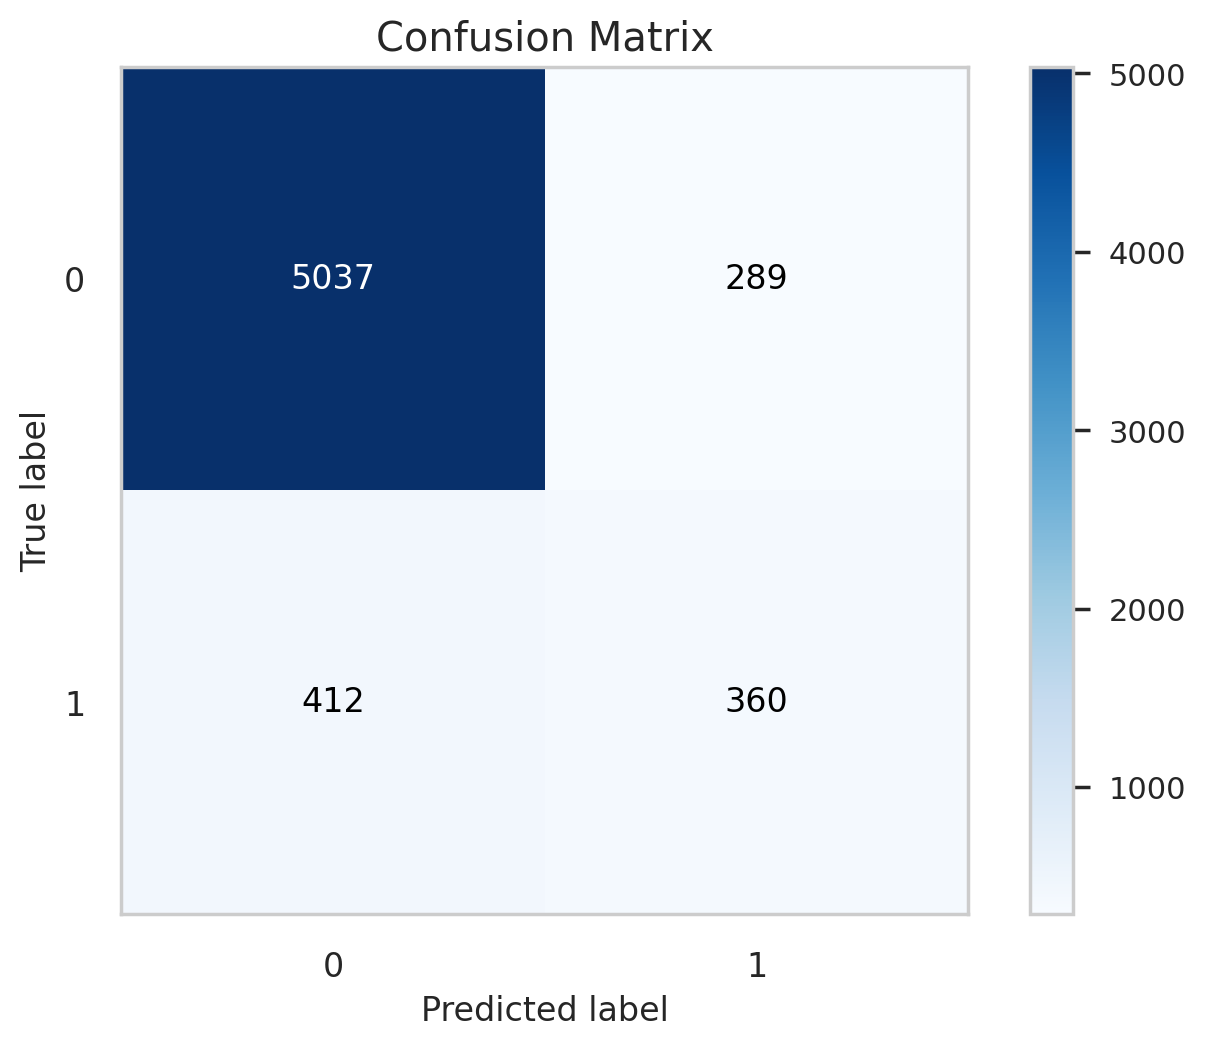

In [106]:
# KNN result
skplt.metrics.plot_confusion_matrix(y_test, knn_pred);

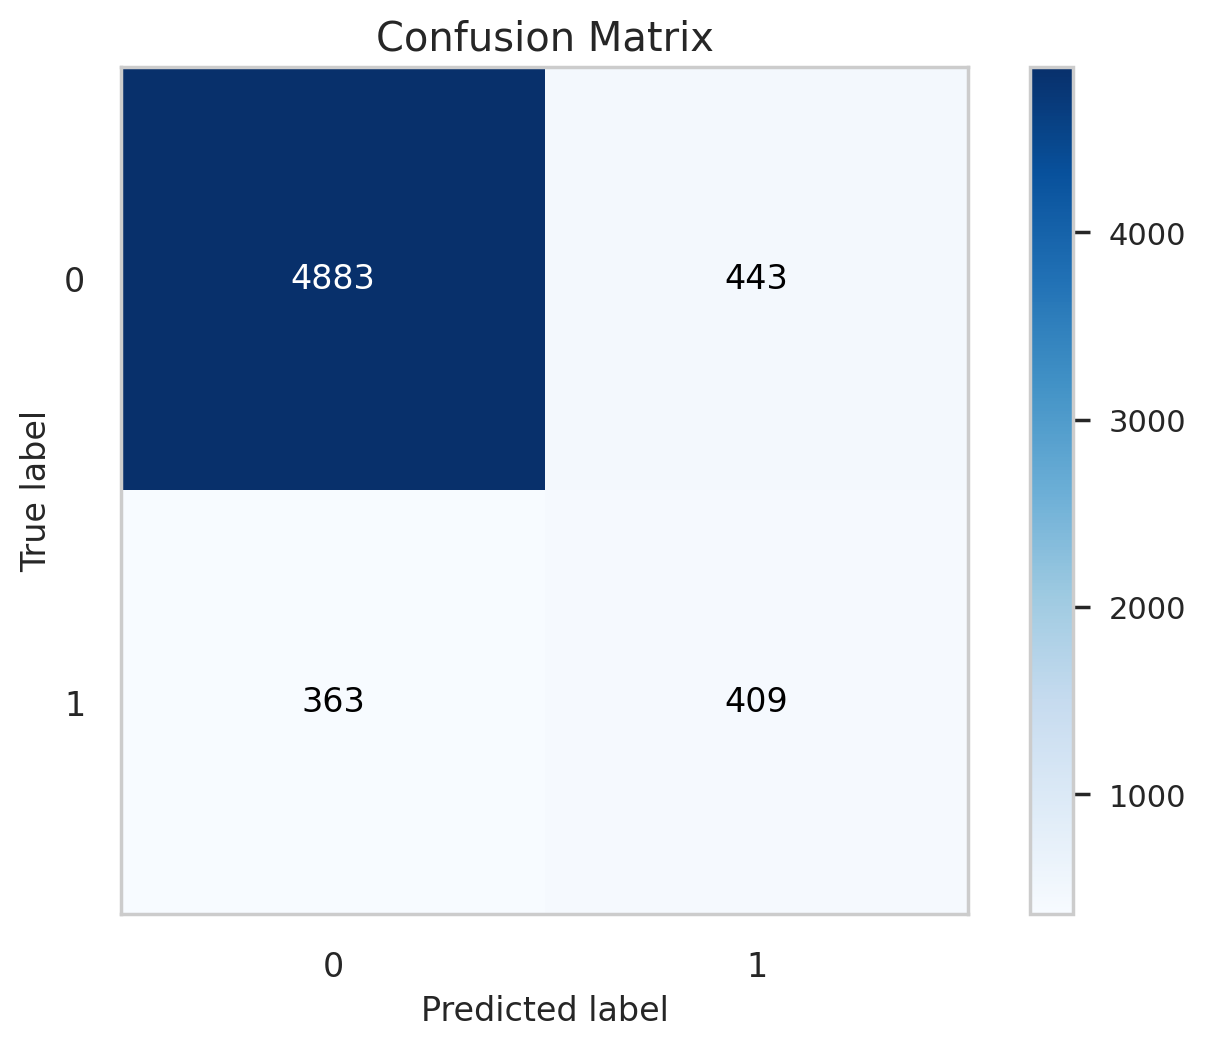

In [107]:
# Decision Tree result
skplt.metrics.plot_confusion_matrix(y_test, dtree_pred);

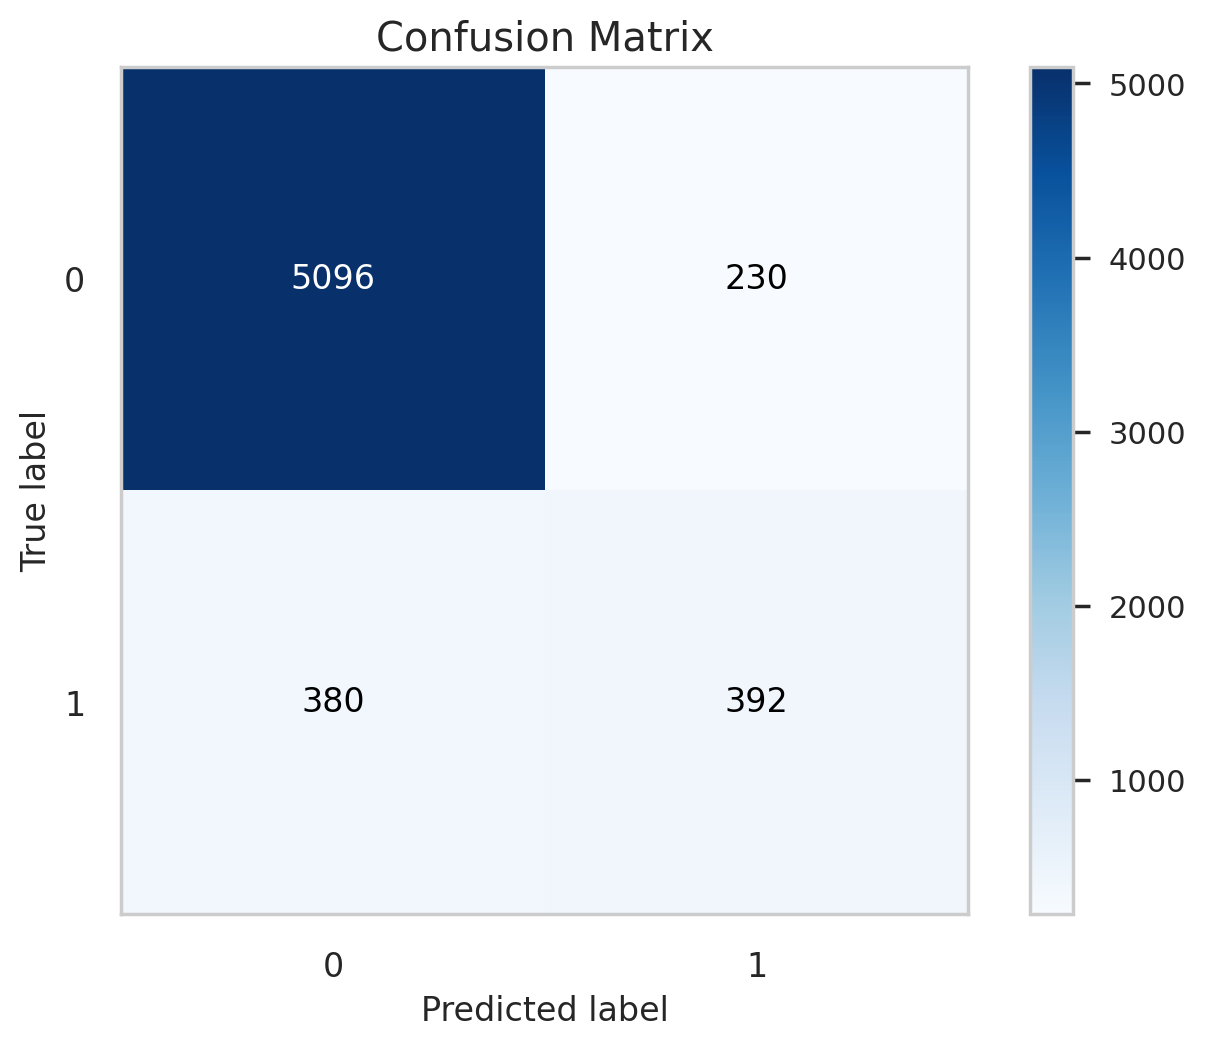

In [108]:
# random forest result
skplt.metrics.plot_confusion_matrix(y_test, rf_pred);

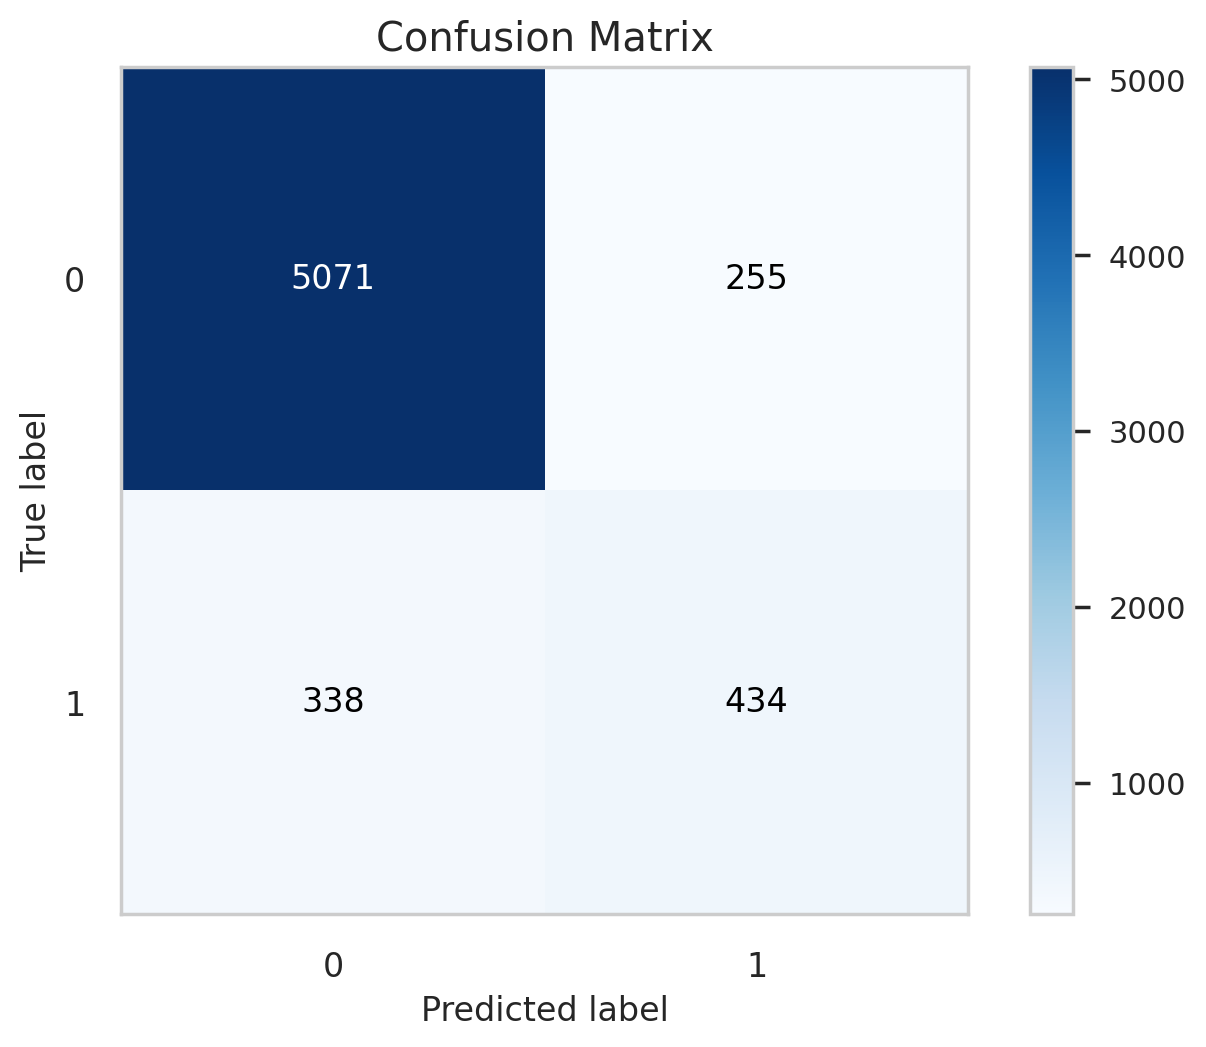

In [109]:
# xgboost result
skplt.metrics.plot_confusion_matrix(y_test, xgb_pred);

### ROC-AUC

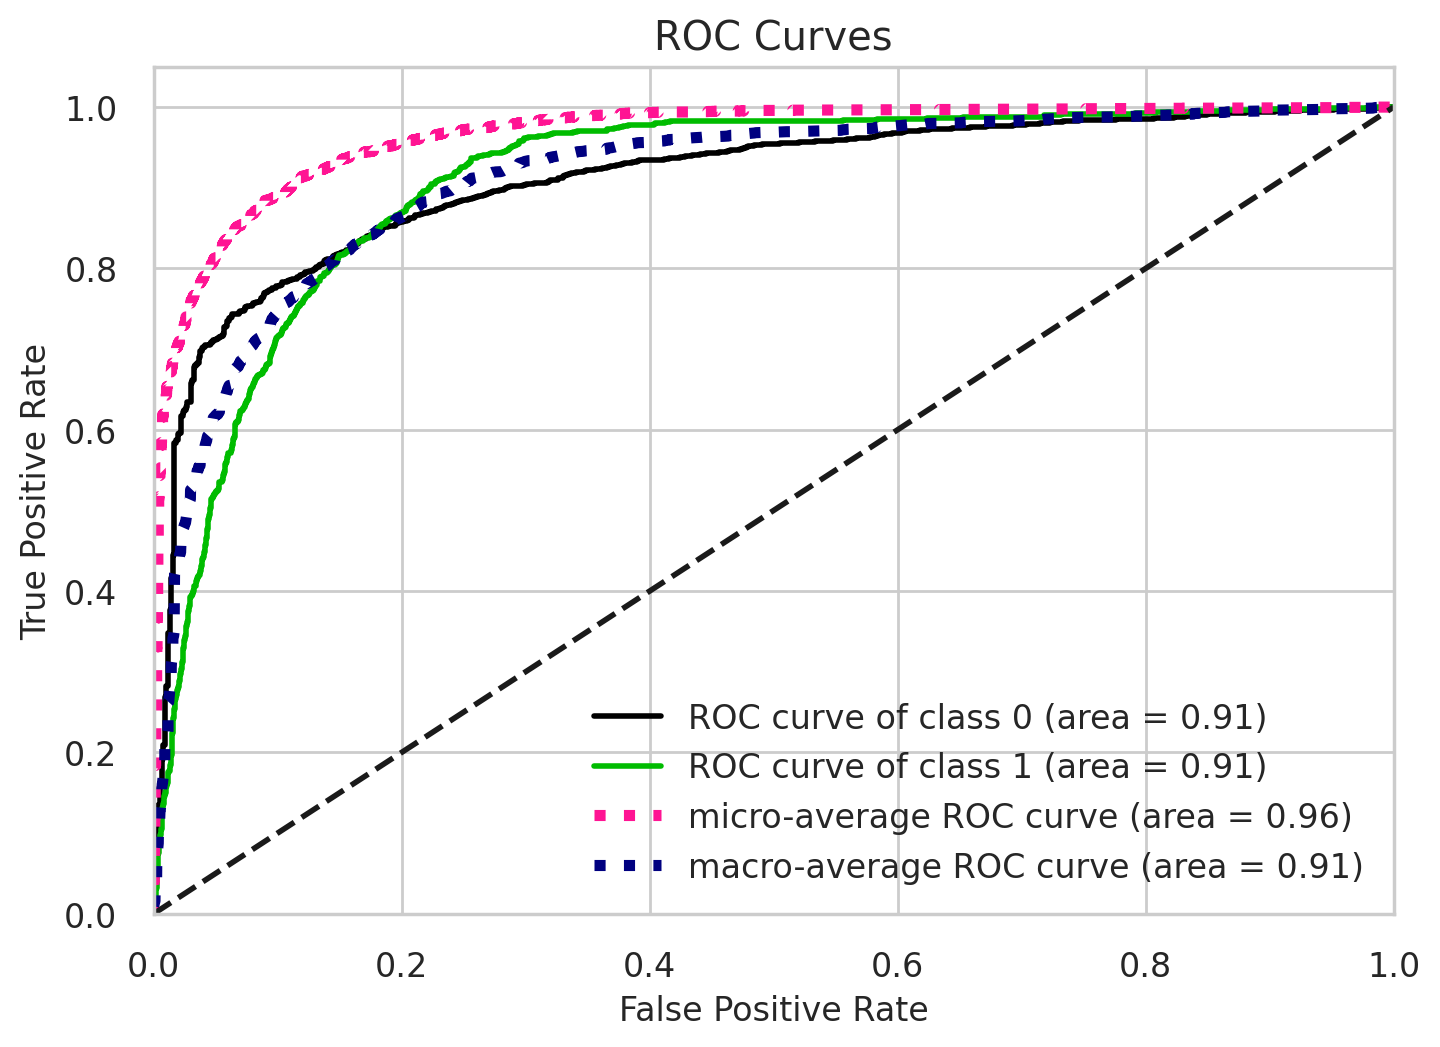

In [110]:
# Log result
skplt.metrics.plot_roc_curve(y_test, lr_pred_proba);

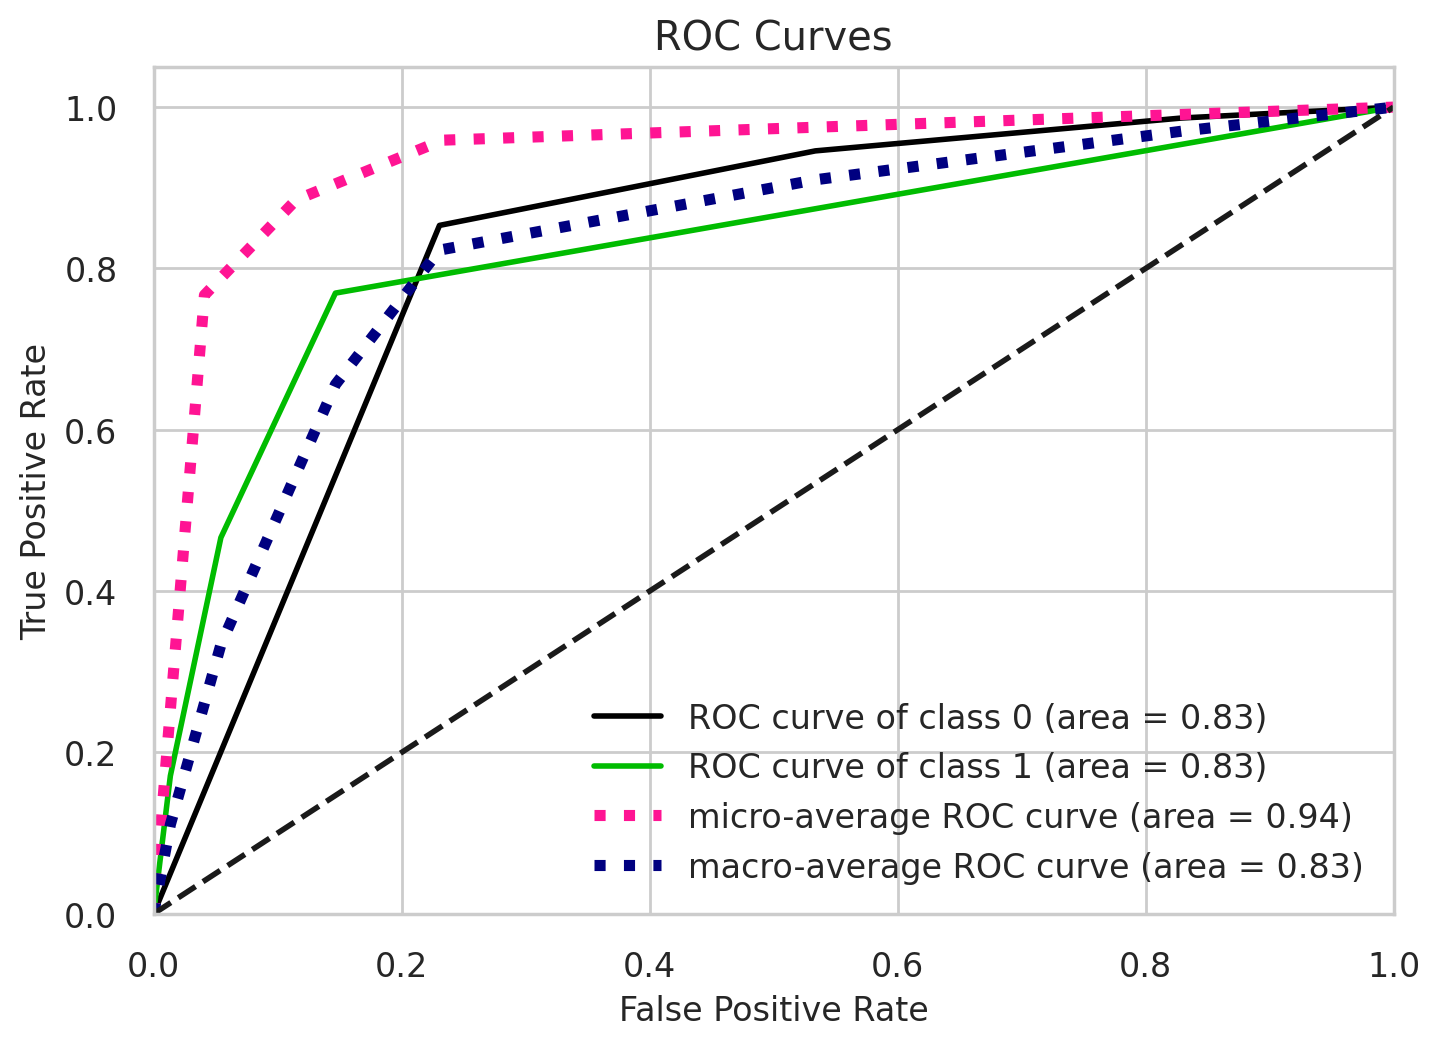

In [111]:
# KNN result
skplt.metrics.plot_roc_curve(y_test, knn_pred_proba);

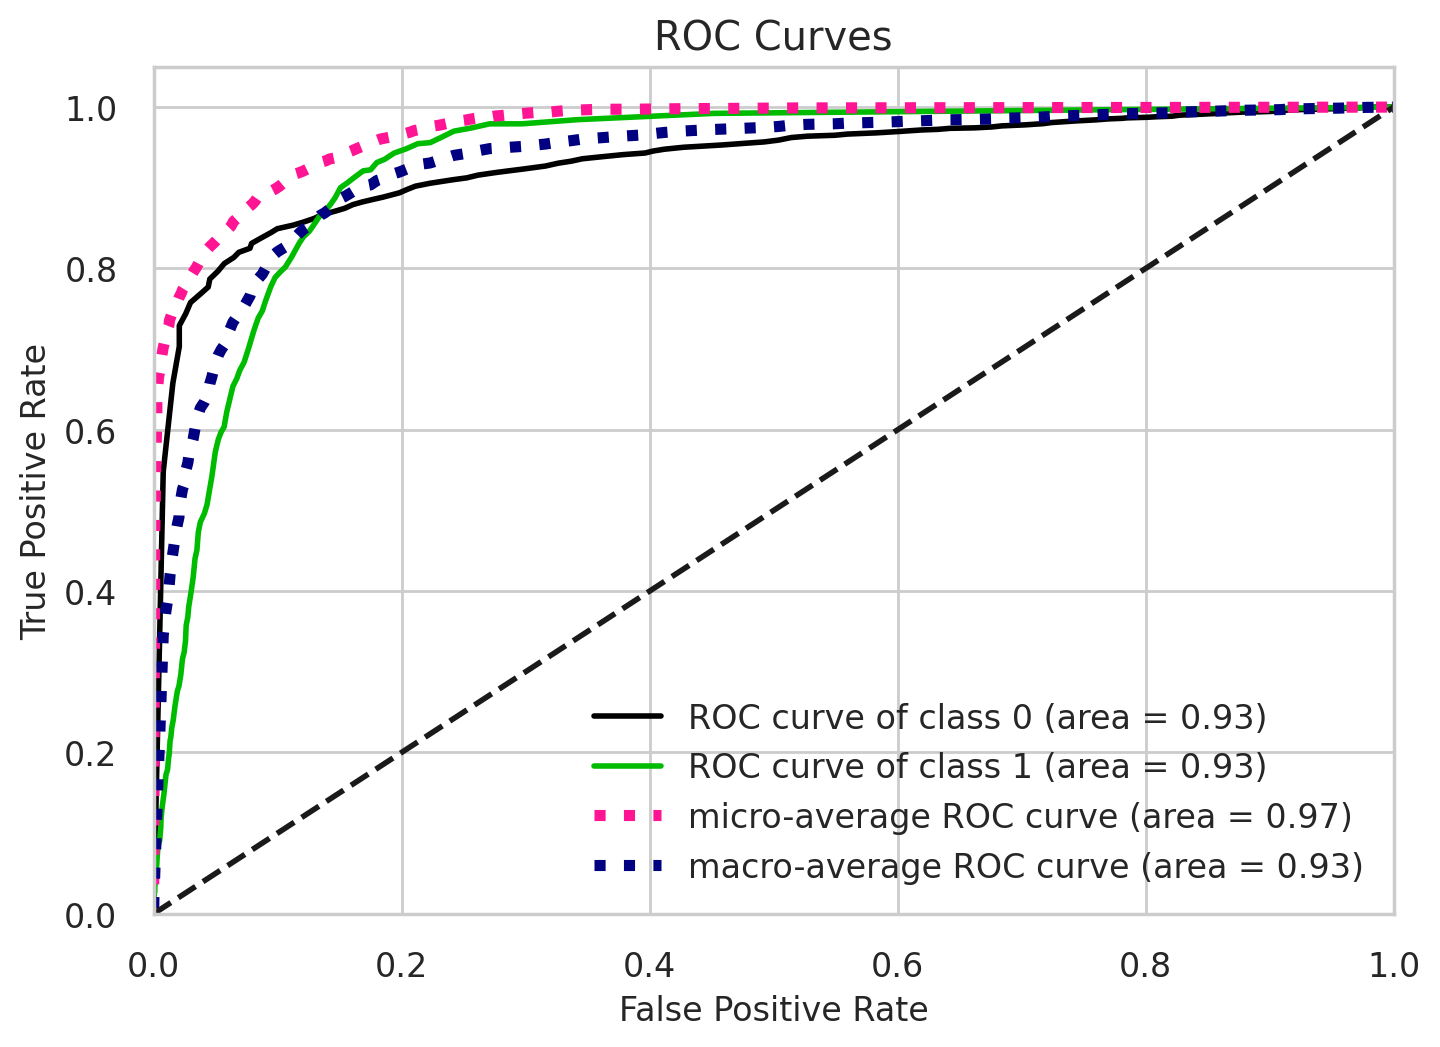

In [112]:
# random forest result
skplt.metrics.plot_roc_curve(y_test, rf_pred_proba);

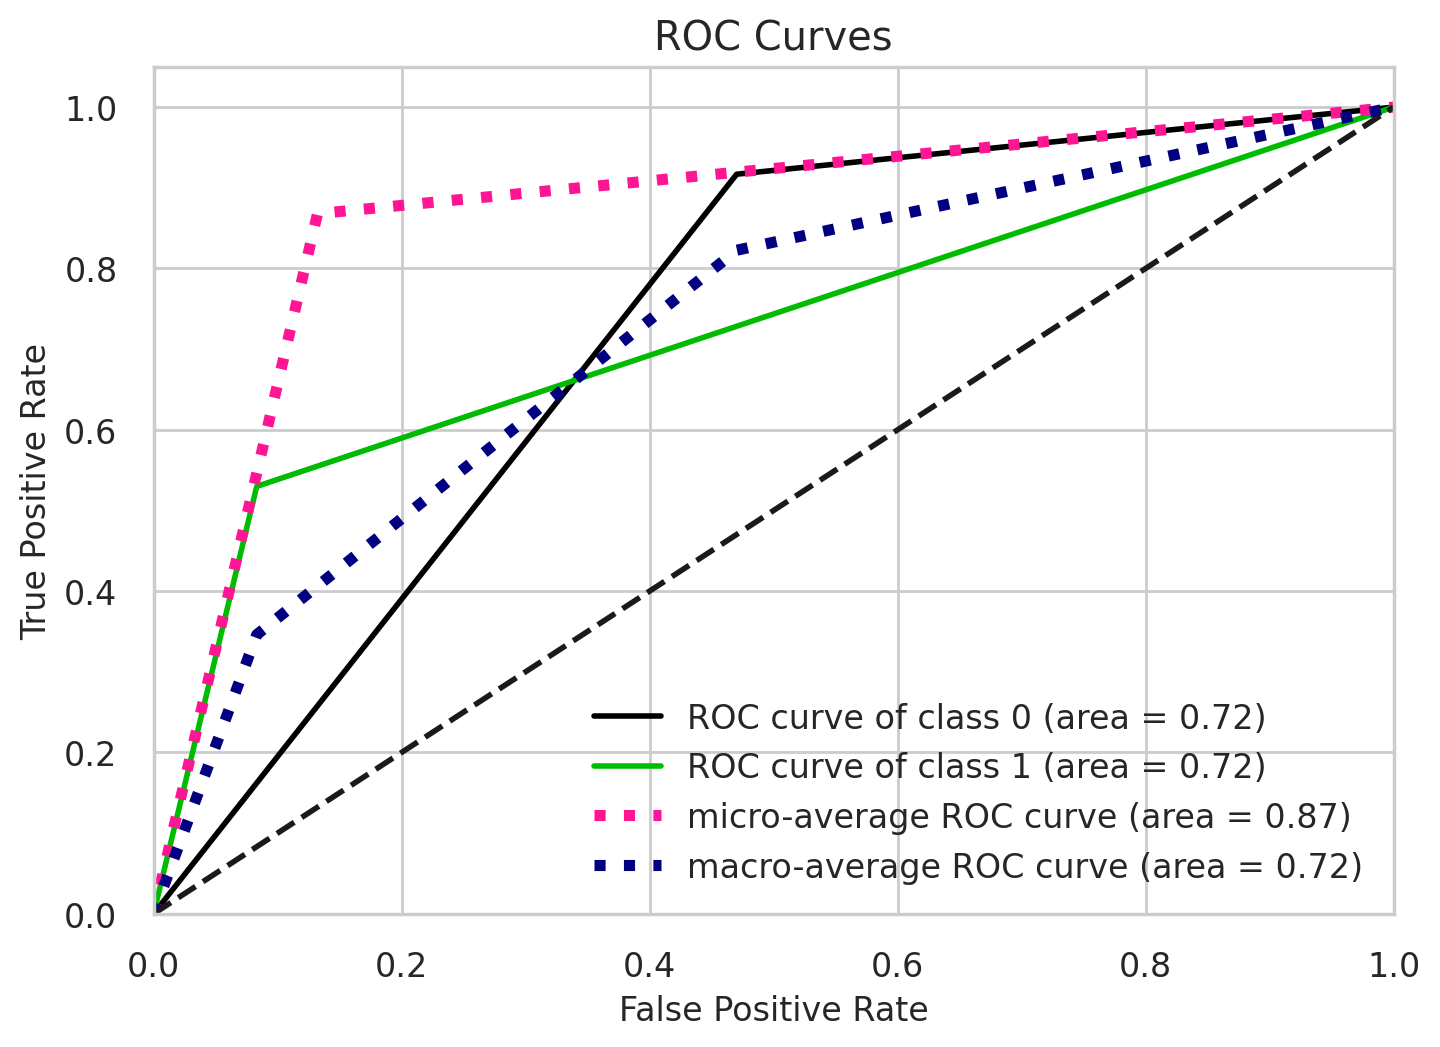

In [113]:
# Decision Tree perceptron result
skplt.metrics.plot_roc_curve(y_test, dtree_pred_proba);

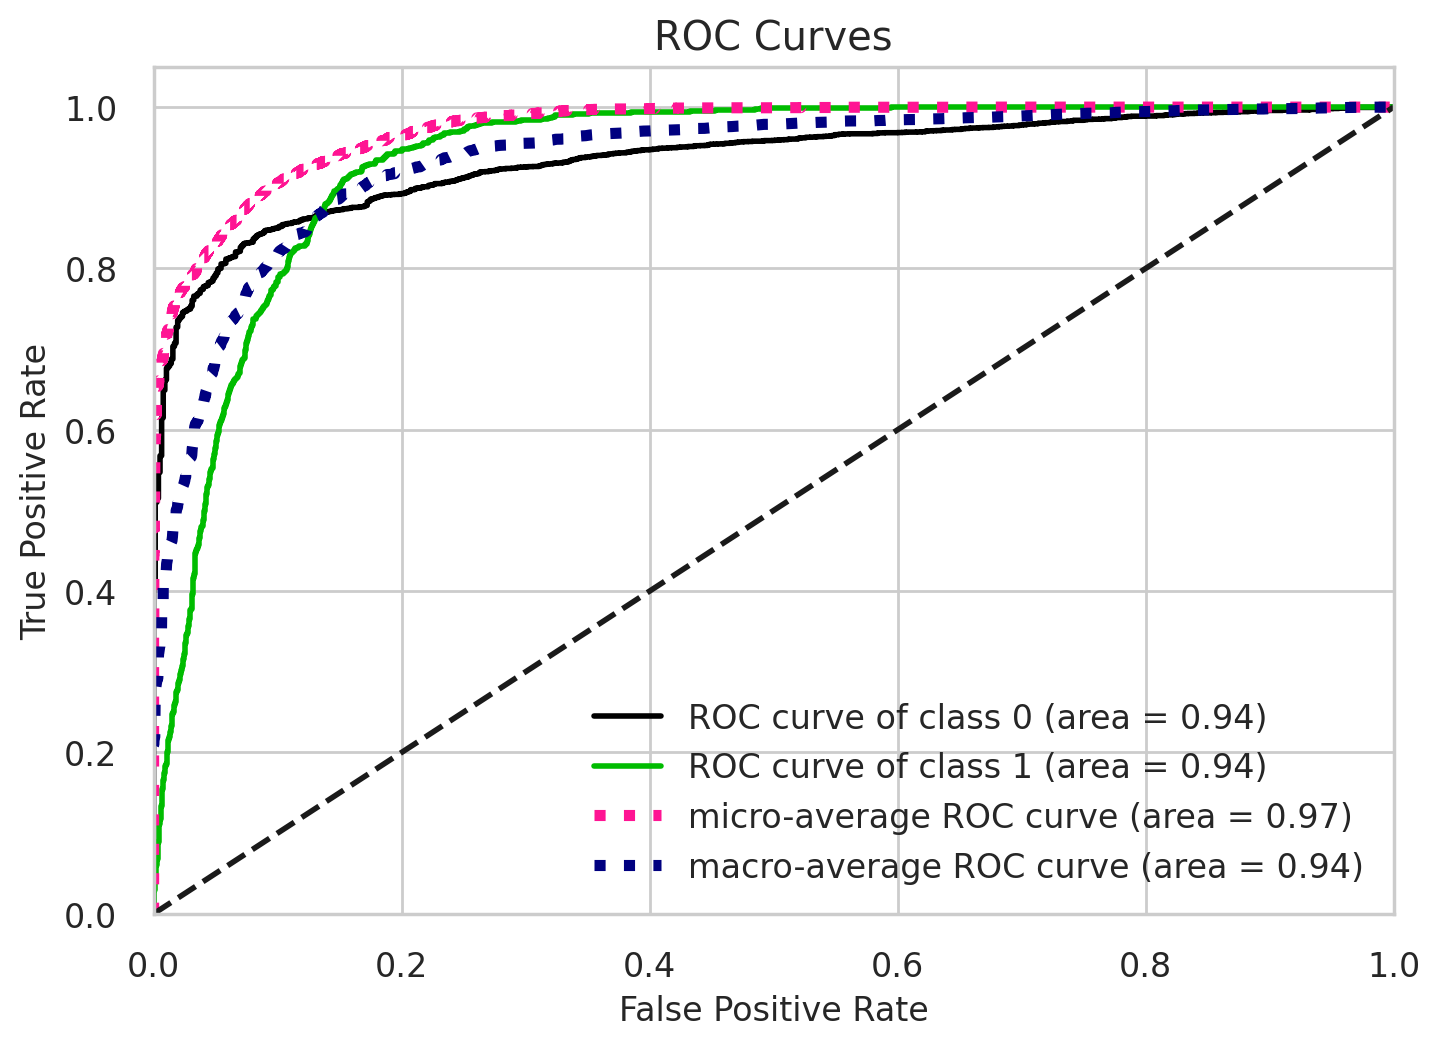

In [114]:
# XGBoost perceptron result
skplt.metrics.plot_roc_curve(y_test, xgb_pred_proba);

### AOC Score

In [115]:
# check LogReg f1-score
metrics.roc_auc_score(y_test, lr_pred)

0.6922702005412883

In [116]:
# check KNN f1-score
metrics.roc_auc_score(y_test, knn_pred)

0.7060295665607567

In [117]:
# check Decision Tree f1-score
metrics.roc_auc_score(y_test, dtree_pred)

0.7233079389601116

In [118]:
# check Random Forest f1-score
metrics.roc_auc_score(y_test, rf_pred)

0.7322938211024614

In [119]:
# check XGBoost f1-score
metrics.roc_auc_score(y_test, xgb_pred)

0.757148916547818

### Precision

In [120]:
# check LogReg f1-score
metrics.precision_score(y_test, lr_pred)

0.618595825426945

In [121]:
# check KNN f1-score
metrics.precision_score(y_test, knn_pred)

0.5546995377503852

In [122]:
# check Decision Tree f1-score
metrics.precision_score(y_test, dtree_pred)

0.4800469483568075

In [123]:
# check Random Forest f1-score
metrics.precision_score(y_test, rf_pred)

0.6302250803858521

In [124]:
# check XGBoost f1-score
metrics.precision_score(y_test, xgb_pred)

0.6298984034833092

### Recall

In [125]:
# check LogReg f1-score
metrics.recall_score(y_test, lr_pred)

0.422279792746114

In [126]:
# check KNN f1-score
metrics.recall_score(y_test, knn_pred)

0.46632124352331605

In [127]:
# check Decision Tree f1-score
metrics.recall_score(y_test, dtree_pred)

0.5297927461139896

In [128]:
# check Random Forest f1-score
metrics.recall_score(y_test, rf_pred)

0.5077720207253886

In [129]:
# check XGBoost f1-score
metrics.recall_score(y_test, xgb_pred)

0.5621761658031088

### F1-Score

In [130]:
# check LogReg f1-score
metrics.f1_score(y_test, lr_pred)

0.5019245573518092

In [131]:
# check KNN f1-score
metrics.f1_score(y_test, knn_pred)

0.5066854327938071

In [132]:
# check Decision Tree f1-score
metrics.f1_score(y_test, dtree_pred)

0.503694581280788

In [133]:
# check Random Forest f1-score
metrics.f1_score(y_test, rf_pred)

0.5624103299856529

In [134]:
# check XGBoost f1-score
metrics.f1_score(y_test, xgb_pred)

0.594113620807666

# Imbalanced Modelling using G-Means

## Logistic Regression

In [135]:
# find fpr and tpr using roc_curve() method
fpr, tpr, thresholds = metrics.roc_curve(y_test, lr_pred_proba[:,1])

# calculate g-means
gmeans = np.sqrt(tpr * (1-fpr))

# find the best threshold
ix = np.argmax(gmeans)

print('Best Threshold={}, G-Mean={}'.format(thresholds[ix], gmeans[ix]))

Best Threshold=0.09448202211594321, G-Mean=0.8377449981201932


### New Prediction

In [136]:
# change predict proba result to optimized one using new threshold
new_pred_result = (lr_pred_proba[:,1] >= thresholds[ix]).astype(int)

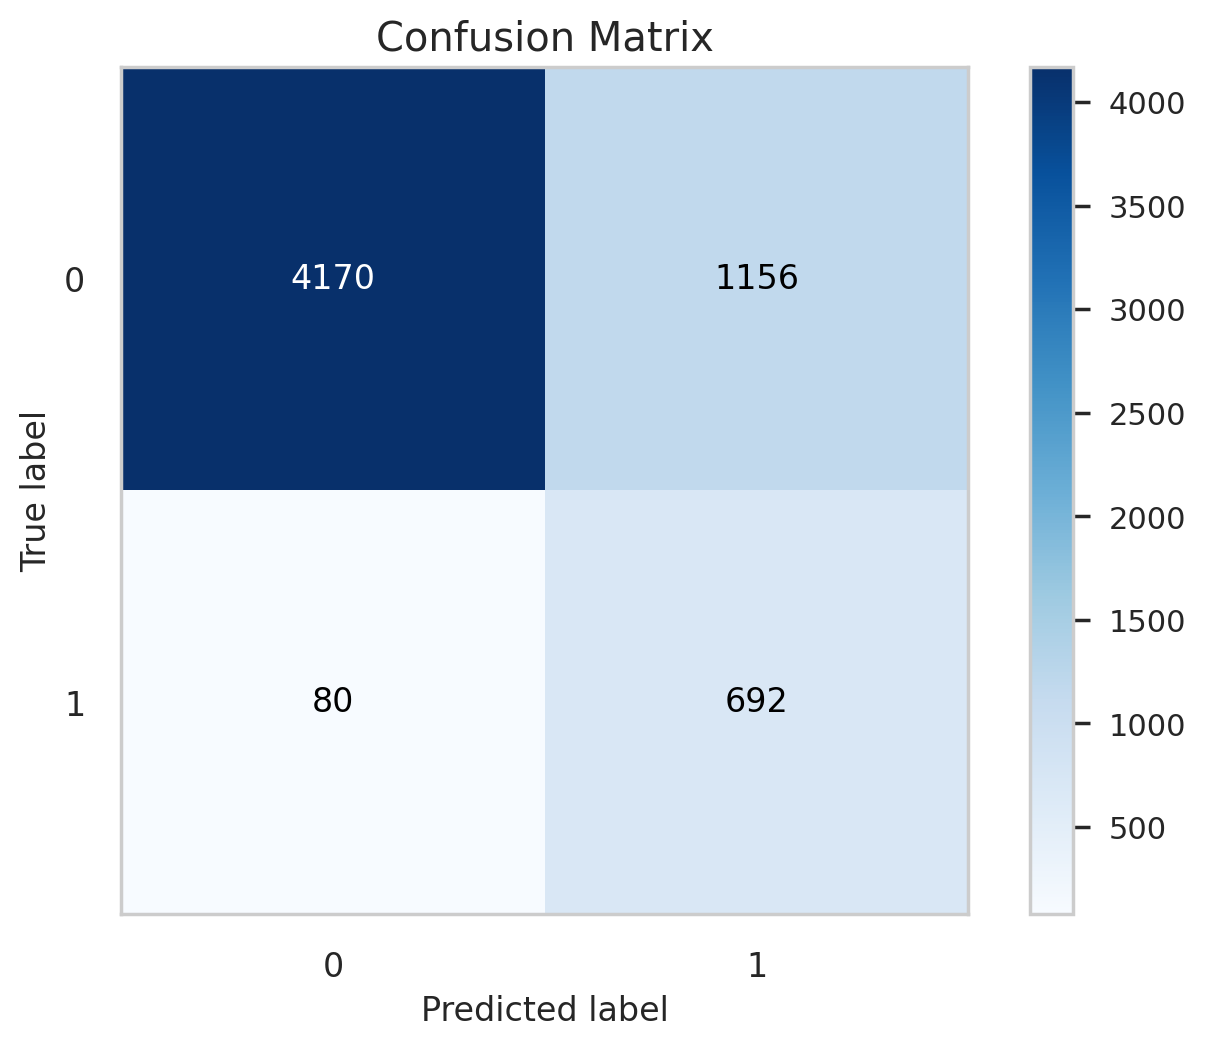

In [137]:
# visualize confusion matrix after setting new threshold
skplt.metrics.plot_confusion_matrix(y_test, new_pred_result);

In [138]:
# check new ROC-AUC
metrics.roc_auc_score(y_test, new_pred_result)

0.8396623076938043

In [139]:
# check new precision
metrics.precision_score(y_test, new_pred_result)

0.37445887445887444

In [140]:
# check new recall
metrics.recall_score(y_test, new_pred_result)

0.8963730569948186

In [141]:
# check new f1-score
metrics.f1_score(y_test, new_pred_result)

0.5282442748091603

In [142]:
# check classification report result of new prediction result
pd.DataFrame(metrics.classification_report(y_test, new_pred_result, target_names=['0','1'], output_dict=True))

0           1  accuracy    macro avg  weighted avg
precision     0.981176    0.374459  0.797311     0.677818      0.904367
recall        0.782952    0.896373  0.797311     0.839662      0.797311
f1-score      0.870927    0.528244  0.797311     0.699586      0.827544
support    5326.000000  772.000000  0.797311  6098.000000   6098.000000

### Old Prediction

In [143]:
# check old ROC-AUC
metrics.roc_auc_score(y_test, lr_pred)

0.6922702005412883

In [144]:
# check old precision
metrics.precision_score(y_test, lr_pred)

0.618595825426945

In [145]:
# check old recall
metrics.recall_score(y_test, lr_pred)

0.422279792746114

In [146]:
# compare to the old f1 score
metrics.f1_score(y_test, lr_pred)

0.5019245573518092

In [147]:
# check classification report result of previous prediction result
pd.DataFrame(metrics.classification_report(y_test, lr_pred, target_names=['0','1'], output_dict=True))

0           1  accuracy    macro avg  weighted avg
precision     0.919943    0.618596    0.8939     0.769269      0.881792
recall        0.962261    0.422280    0.8939     0.692270      0.893900
f1-score      0.940626    0.501925    0.8939     0.721275      0.885087
support    5326.000000  772.000000    0.8939  6098.000000   6098.000000

## K-Nearest Neighbors

In [148]:
# find fpr and tpr using roc_curve() method
fpr, tpr, thresholds = metrics.roc_curve(y_test, knn_pred_proba[:,1])

# calculate g-means
gmeans = np.sqrt(tpr * (1-fpr))

# find the best threshold
ix = np.argmax(gmeans)

print('Best Threshold={}, G-Mean={}'.format(thresholds[ix], gmeans[ix]))

Best Threshold=0.3333333333333333, G-Mean=0.8103095083617045


### New Prediction

In [149]:
# change predict proba result to optimized one using new threshold
new_pred_result = (knn_pred_proba[:,1] >= thresholds[ix]).astype(int)

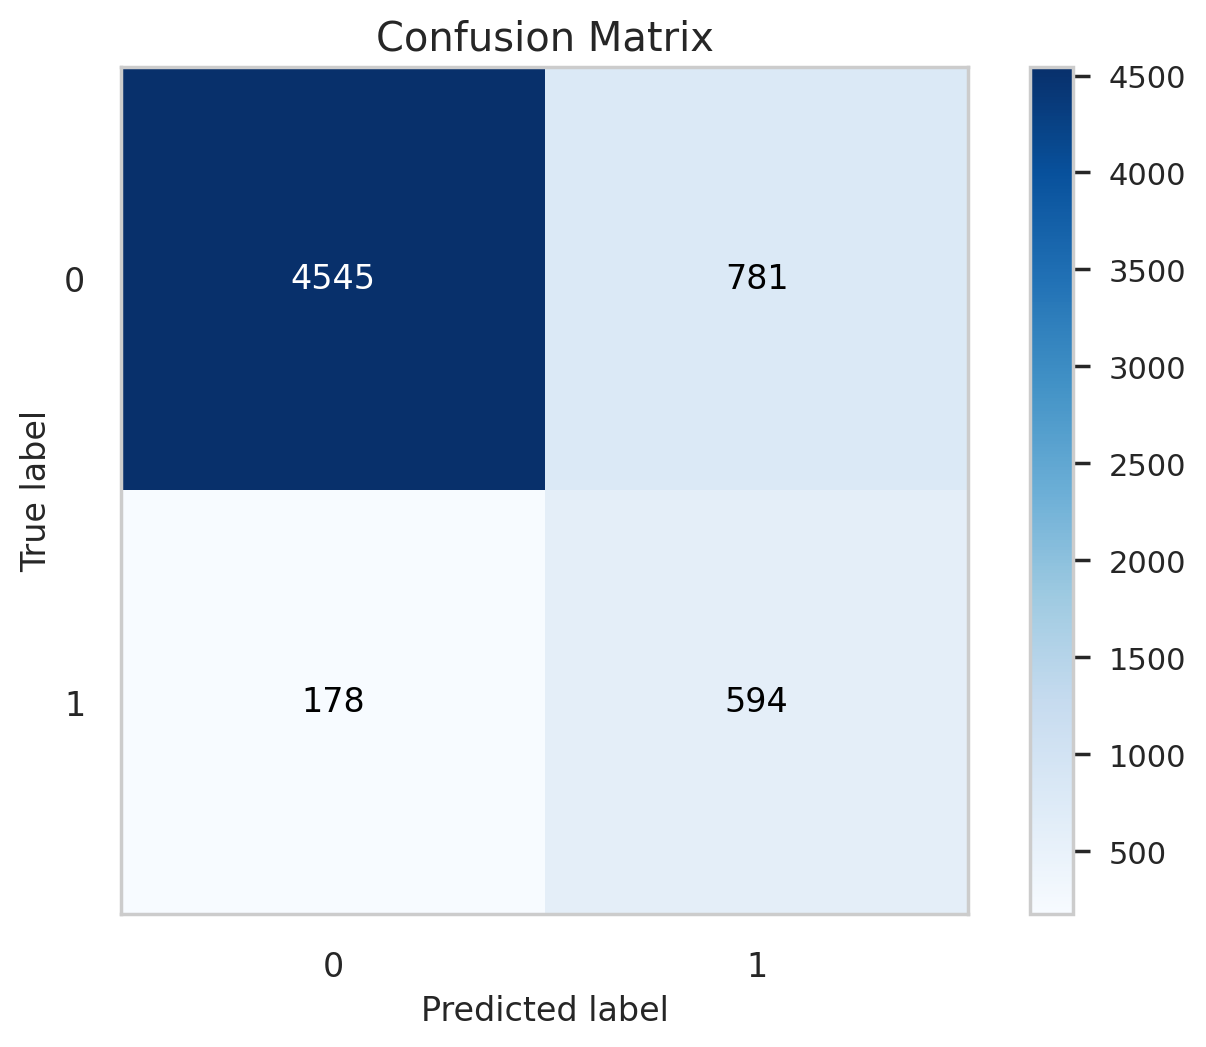

In [150]:
# visualize confusion matrix after setting new threshold
skplt.metrics.plot_confusion_matrix(y_test, new_pred_result);

In [151]:
# check new ROC-AUC
metrics.roc_auc_score(y_test, new_pred_result)

0.8113954615056842

In [152]:
# check new precision
metrics.precision_score(y_test, new_pred_result)

0.432

In [153]:
# check new recall
metrics.recall_score(y_test, new_pred_result)

0.7694300518134715

In [154]:
# check new f1-score
metrics.f1_score(y_test, new_pred_result)

0.5533302282254308

In [155]:
# check classification report result of new prediction result
pd.DataFrame(metrics.classification_report(y_test, new_pred_result, target_names=['0','1'], output_dict=True))

0          1  accuracy    macro avg  weighted avg
precision     0.962312    0.43200  0.842735     0.697156      0.895175
recall        0.853361    0.76943  0.842735     0.811395      0.842735
f1-score      0.904568    0.55333  0.842735     0.728949      0.860101
support    5326.000000  772.00000  0.842735  6098.000000   6098.000000

### Old Prediction

In [156]:
# check old ROC-AUC
metrics.roc_auc_score(y_test, lr_pred)

0.6922702005412883

In [157]:
# check old precision
metrics.precision_score(y_test, knn_pred)

0.5546995377503852

In [158]:
# check old recall
metrics.recall_score(y_test, knn_pred)

0.46632124352331605

In [159]:
# compare to the old f1 score
metrics.f1_score(y_test, knn_pred)

0.5066854327938071

In [160]:
# check classification report result of previous prediction result
pd.DataFrame(metrics.classification_report(y_test, knn_pred, target_names=['0','1'], output_dict=True))

0           1  accuracy    macro avg  weighted avg
precision     0.924390    0.554700  0.885044     0.739545      0.877587
recall        0.945738    0.466321  0.885044     0.706030      0.885044
f1-score      0.934942    0.506685  0.885044     0.720814      0.880725
support    5326.000000  772.000000  0.885044  6098.000000   6098.000000

## Decision Tree

In [161]:
# find fpr and tpr using roc_curve() method
fpr, tpr, thresholds = metrics.roc_curve(y_test, dtree_pred_proba[:,1])

# calculate g-means
gmeans = np.sqrt(tpr * (1-fpr))

# find the best threshold
ix = np.argmax(gmeans)

print('Best Threshold={}, G-Mean={}'.format(thresholds[ix], gmeans[ix]))

Best Threshold=1.0, G-Mean=0.6969406321204502


In [162]:
# change predict proba result to optimized one using new threshold
new_pred_result = (dtree_pred_proba[:,1] >= thresholds[ix]).astype(int)

### New Prediction

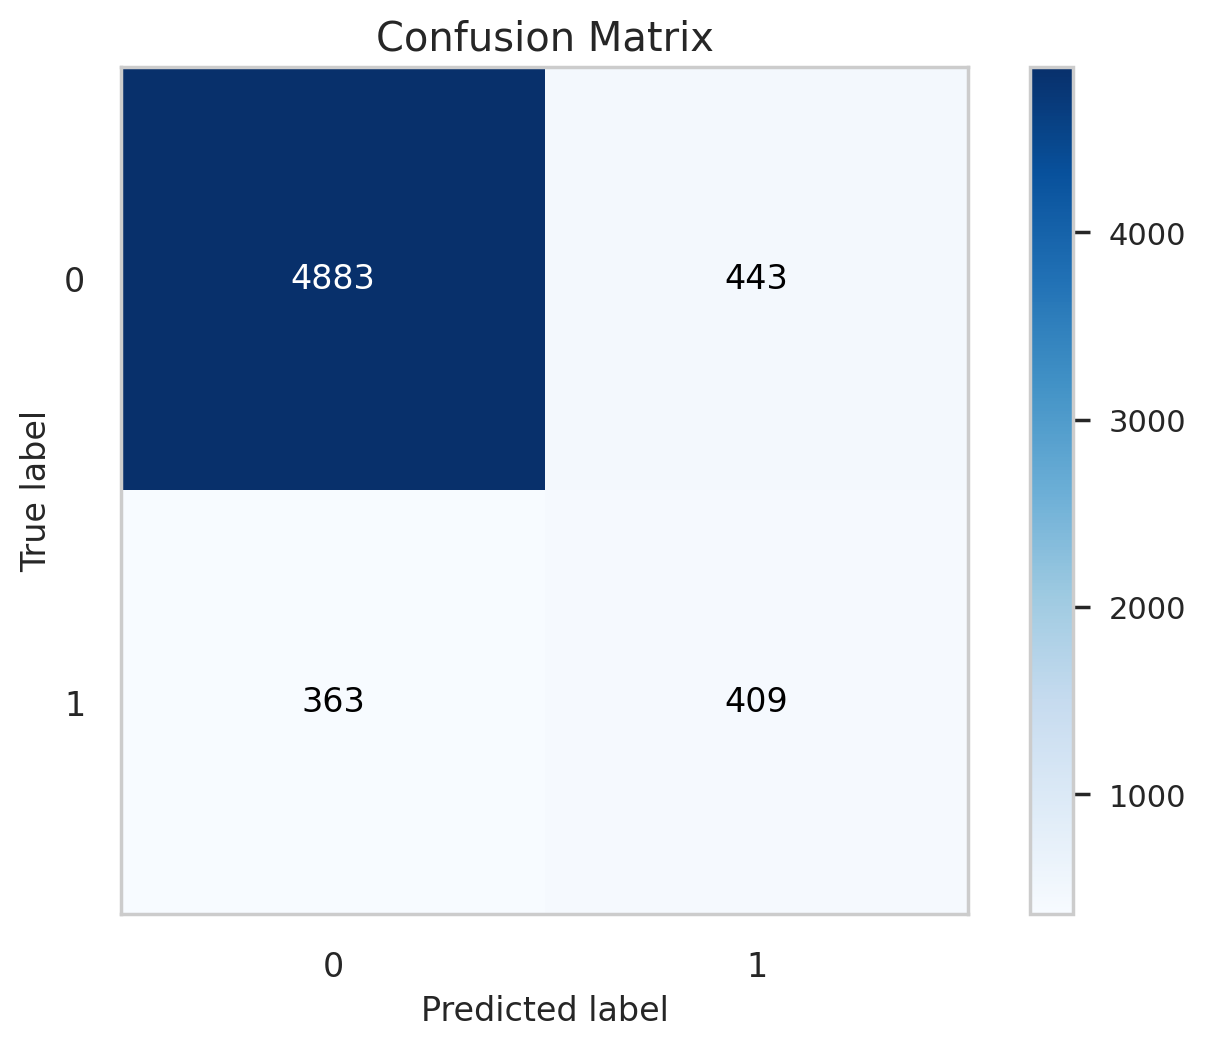

In [163]:
# visualize confusion matrix after setting new threshold
skplt.metrics.plot_confusion_matrix(y_test, new_pred_result);

In [164]:
# check new ROC-AUC
metrics.roc_auc_score(y_test, new_pred_result)

0.7233079389601116

In [165]:
# check new precision
metrics.precision_score(y_test, new_pred_result)

0.4800469483568075

In [166]:
# check new recall
metrics.recall_score(y_test, new_pred_result)

0.5297927461139896

In [167]:
# check new f1-score
metrics.f1_score(y_test, new_pred_result)

0.503694581280788

In [168]:
# check classification report result of new prediction result
pd.DataFrame(metrics.classification_report(y_test, new_pred_result, target_names=['0','1'], output_dict=True))

0           1  accuracy    macro avg  weighted avg
precision     0.930804    0.480047  0.867826     0.705426      0.873739
recall        0.916823    0.529793  0.867826     0.723308      0.867826
f1-score      0.923761    0.503695  0.867826     0.713728      0.870581
support    5326.000000  772.000000  0.867826  6098.000000   6098.000000

### Old Prediction

In [169]:
# check old f1-score
metrics.roc_auc_score(y_test, dtree_pred)

0.7233079389601116

In [170]:
# check old precision
metrics.precision_score(y_test, dtree_pred)

0.4800469483568075

In [171]:
# check old recall
metrics.recall_score(y_test, dtree_pred)

0.5297927461139896

In [172]:
# compare to the old f1 score
metrics.f1_score(y_test, dtree_pred)

0.503694581280788

In [173]:
# check classification report result of previous prediction result
pd.DataFrame(metrics.classification_report(y_test, dtree_pred, target_names=['0','1'], output_dict=True))

0           1  accuracy    macro avg  weighted avg
precision     0.930804    0.480047  0.867826     0.705426      0.873739
recall        0.916823    0.529793  0.867826     0.723308      0.867826
f1-score      0.923761    0.503695  0.867826     0.713728      0.870581
support    5326.000000  772.000000  0.867826  6098.000000   6098.000000

## Random Forest

In [174]:
# find fpr and tpr using roc_curve() method
fpr, tpr, thresholds = metrics.roc_curve(y_test, rf_pred_proba[:,1])

# calculate g-means
gmeans = np.sqrt(tpr * (1-fpr))

# find the best threshold
ix = np.argmax(gmeans)

print('Best Threshold={}, G-Mean={}'.format(thresholds[ix], gmeans[ix]))

Best Threshold=0.15, G-Mean=0.8748453221014586


In [175]:
# change predict proba result to optimized one using new threshold
new_pred_result = (rf_pred_proba[:,1] >= thresholds[ix]).astype(int)

### New Prediction

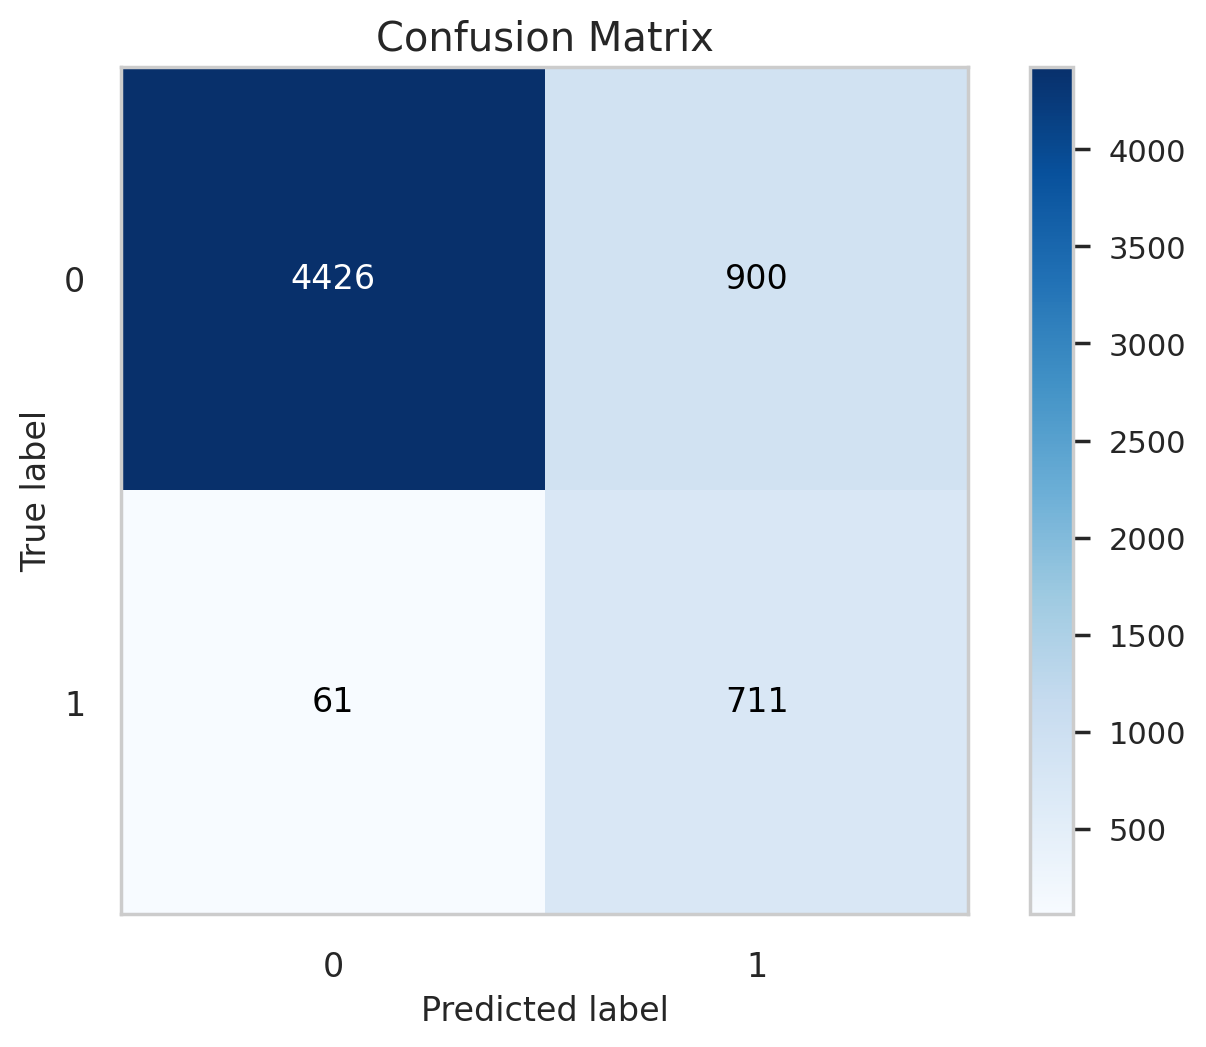

In [176]:
# visualize confusion matrix after setting new threshold
skplt.metrics.plot_confusion_matrix(y_test, new_pred_result);

In [177]:
# check new ROC-AUC
metrics.roc_auc_score(y_test, new_pred_result)

0.8760010526131462

In [178]:
# check new precision
metrics.precision_score(y_test, new_pred_result)

0.441340782122905

In [179]:
# check new recall
metrics.recall_score(y_test, new_pred_result)

0.9209844559585493

In [180]:
# check new f1-score
metrics.f1_score(y_test, new_pred_result)

0.5967268149391524

In [181]:
# check classification report result of new prediction result
pd.DataFrame(metrics.classification_report(y_test, new_pred_result, target_names=['0','1'], output_dict=True))

0           1  accuracy    macro avg  weighted avg
precision     0.986405    0.441341  0.842407     0.713873      0.917401
recall        0.831018    0.920984  0.842407     0.876001      0.842407
f1-score      0.902069    0.596727  0.842407     0.749398      0.863413
support    5326.000000  772.000000  0.842407  6098.000000   6098.000000

### Old Prediction

In [182]:
# check old ROC-AUC
metrics.roc_auc_score(y_test, rf_pred)

0.7322938211024614

In [183]:
# check old precision
metrics.precision_score(y_test, rf_pred)

0.6302250803858521

In [184]:
# check old recall
metrics.recall_score(y_test, rf_pred)

0.5077720207253886

In [185]:
# compare to the old f1 score
metrics.f1_score(y_test, rf_pred)

0.5624103299856529

In [186]:
# check classification report result of previous prediction result
pd.DataFrame(metrics.classification_report(y_test, rf_pred, target_names=['0','1'], output_dict=True))

0           1  accuracy    macro avg  weighted avg
precision     0.930606    0.630225  0.899967     0.780416      0.892578
recall        0.956816    0.507772  0.899967     0.732294      0.899967
f1-score      0.943529    0.562410  0.899967     0.752970      0.895280
support    5326.000000  772.000000  0.899967  6098.000000   6098.000000

## XGBoost

In [187]:
# find fpr and tpr using roc_curve() method
fpr, tpr, thresholds = metrics.roc_curve(y_test, xgb_pred_proba[:,1])

# calculate g-means
gmeans = np.sqrt(tpr * (1-fpr))

# find the best threshold
ix = np.argmax(gmeans)

print('Best Threshold={}, G-Mean={}'.format(thresholds[ix], gmeans[ix]))

Best Threshold=0.11334197223186493, G-Mean=0.8780783669217384


In [188]:
# change predict proba result to optimized one using new threshold
new_pred_result = (xgb_pred_proba[:,1] >= thresholds[ix]).astype(int)

### New Prediction

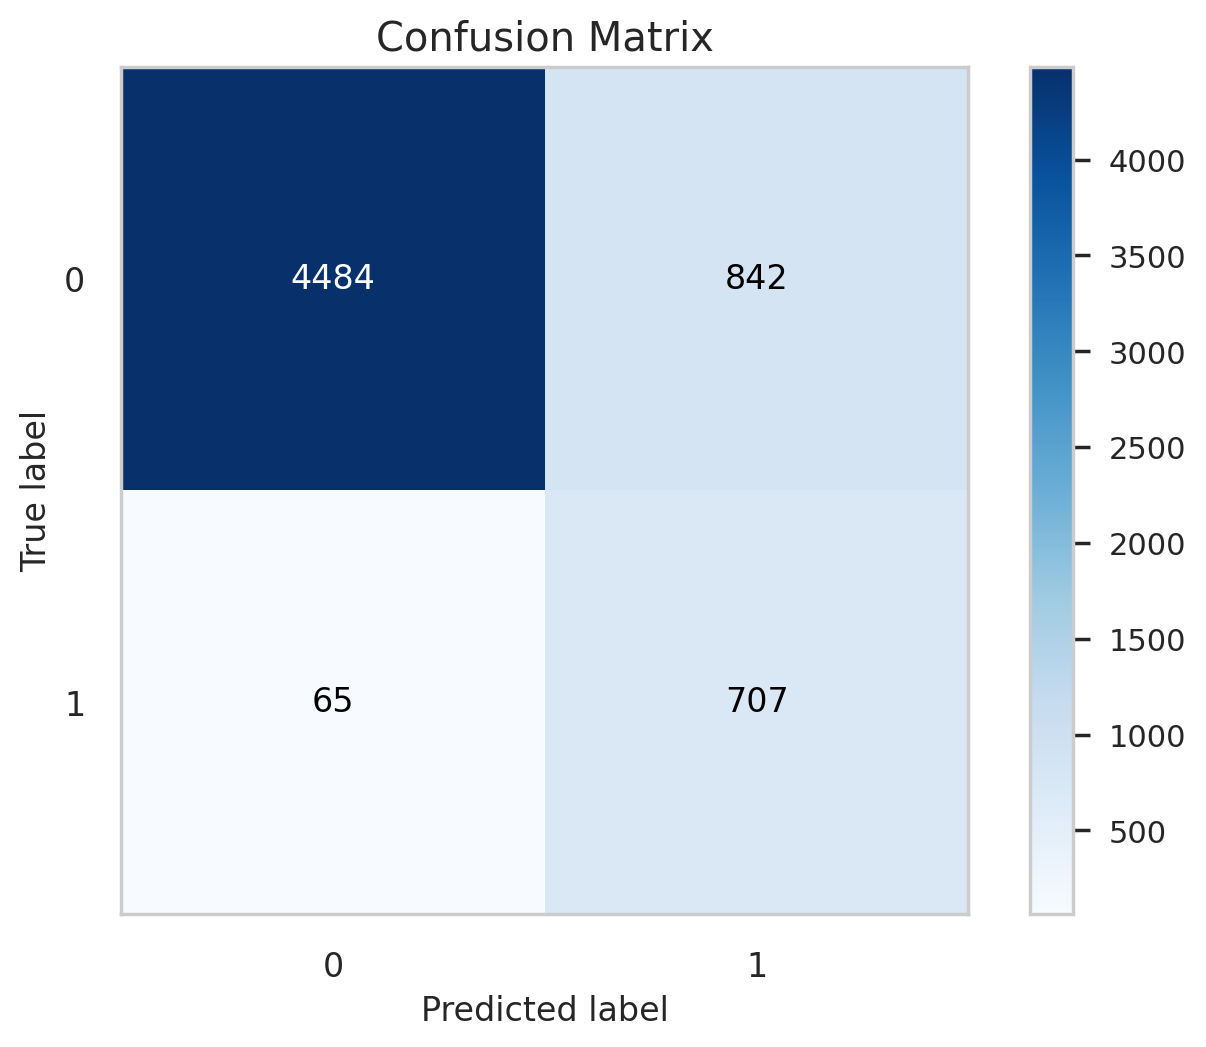

In [189]:
# visualize confusion matrix after setting new threshold
skplt.metrics.plot_confusion_matrix(y_test, new_pred_result);

In [190]:
# check new ROC-AUC
metrics.roc_auc_score(y_test, new_pred_result)

0.878855365894945

In [191]:
# check new precision
metrics.precision_score(y_test, new_pred_result)

0.4564234990316333

In [192]:
# check new recall
metrics.recall_score(y_test, new_pred_result)

0.9158031088082902

In [193]:
# check new f1-score
metrics.f1_score(y_test, new_pred_result)

0.6092201637225335

In [194]:
# check classification report result of new prediction result
pd.DataFrame(metrics.classification_report(y_test, new_pred_result, target_names=['0','1'], output_dict=True))

0           1  accuracy    macro avg  weighted avg
precision     0.985711    0.456423  0.851263     0.721067      0.918704
recall        0.841908    0.915803  0.851263     0.878855      0.851263
f1-score      0.908152    0.609220  0.851263     0.758686      0.870307
support    5326.000000  772.000000  0.851263  6098.000000   6098.000000

### Old Prediction

In [195]:
# check old ROC-AUC
metrics.roc_auc_score(y_test, xgb_pred)

0.757148916547818

In [196]:
# check old precision
metrics.precision_score(y_test, xgb_pred)

0.6298984034833092

In [197]:
# check old recall
metrics.recall_score(y_test, xgb_pred)

0.5621761658031088

In [198]:
# compare to the old f1 score
metrics.f1_score(y_test, xgb_pred)

0.594113620807666

In [199]:
# check classification report result of previous prediction result
pd.DataFrame(metrics.classification_report(y_test, xgb_pred, target_names=['0','1'], output_dict=True))

0           1  accuracy    macro avg  weighted avg
precision     0.937512    0.629898  0.902755     0.783705      0.898568
recall        0.952122    0.562176  0.902755     0.757149      0.902755
f1-score      0.944760    0.594114  0.902755     0.769437      0.900369
support    5326.000000  772.000000  0.902755  6098.000000   6098.000000

# Model Agnostics

### Variable Importance - Partial Dependence Plot

In [200]:
## initiate explainer for LogReg model
churn_exp = dx.Explainer(xgb, X_train, y_train, label = "XGBoost Interpretation")

Preparation of a new explainer is initiated

  -> data              : 24390 rows 19 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 24390 values
  -> model_class       : xgboost.sklearn.XGBClassifier (default)
  -> label             : XGBoost Interpretation
  -> predict function  : <function yhat_proba_default at 0x7c6b2268c3a0> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 3.03e-06, mean = 0.127, max = 0.995
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.841, mean = -3.26e-05, max = 0.99
  -> model_info        : package xgboost

A new explainer has been created!


In [201]:
# visualize permutation feature importance for XGBoost model
churn_exp.model_parts().plot()

In [202]:
# create partial dependence plot of XGBoost model
churn_exp.model_profile().plot()

Calculating ceteris paribus: 100%|██████████| 19/19 [00:02<00:00,  8.23it/s]


# Business Evaluation Metrics

### Gain Cumulative Curve

<Axes: title={'center': 'Cumulative Gains Curve'}, xlabel='Percentage of sample', ylabel='Gain'>

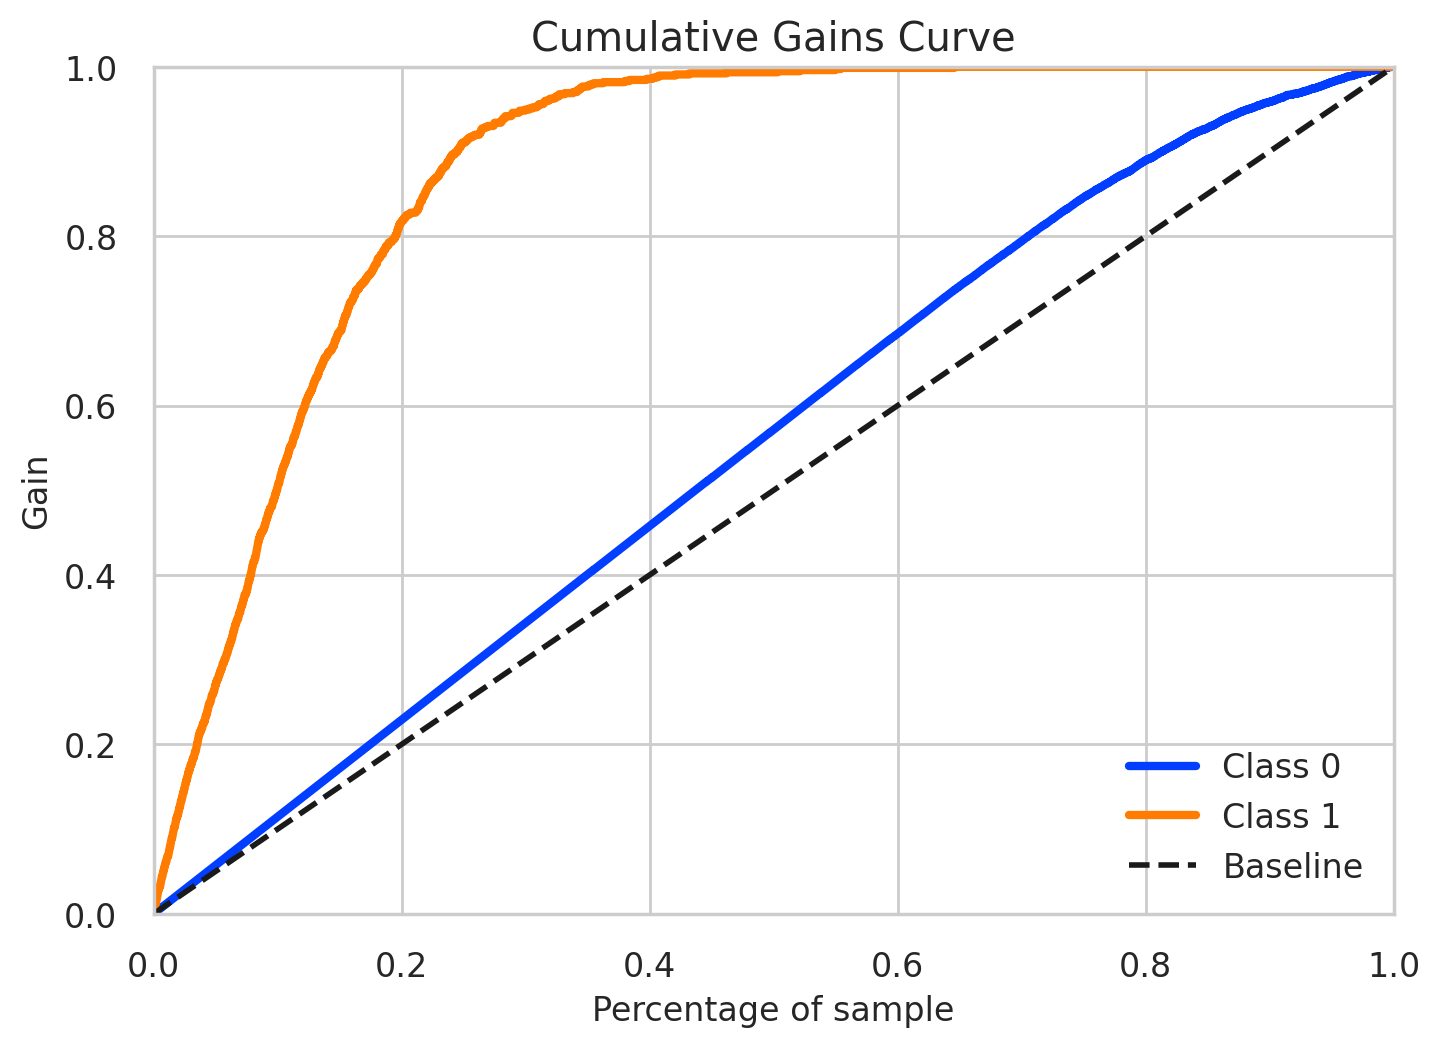

In [204]:
skplt.metrics.plot_cumulative_gain(y_test, xgb_pred_proba)

### Lift Curve

<Axes: title={'center': 'Lift Curve'}, xlabel='Percentage of sample', ylabel='Lift'>

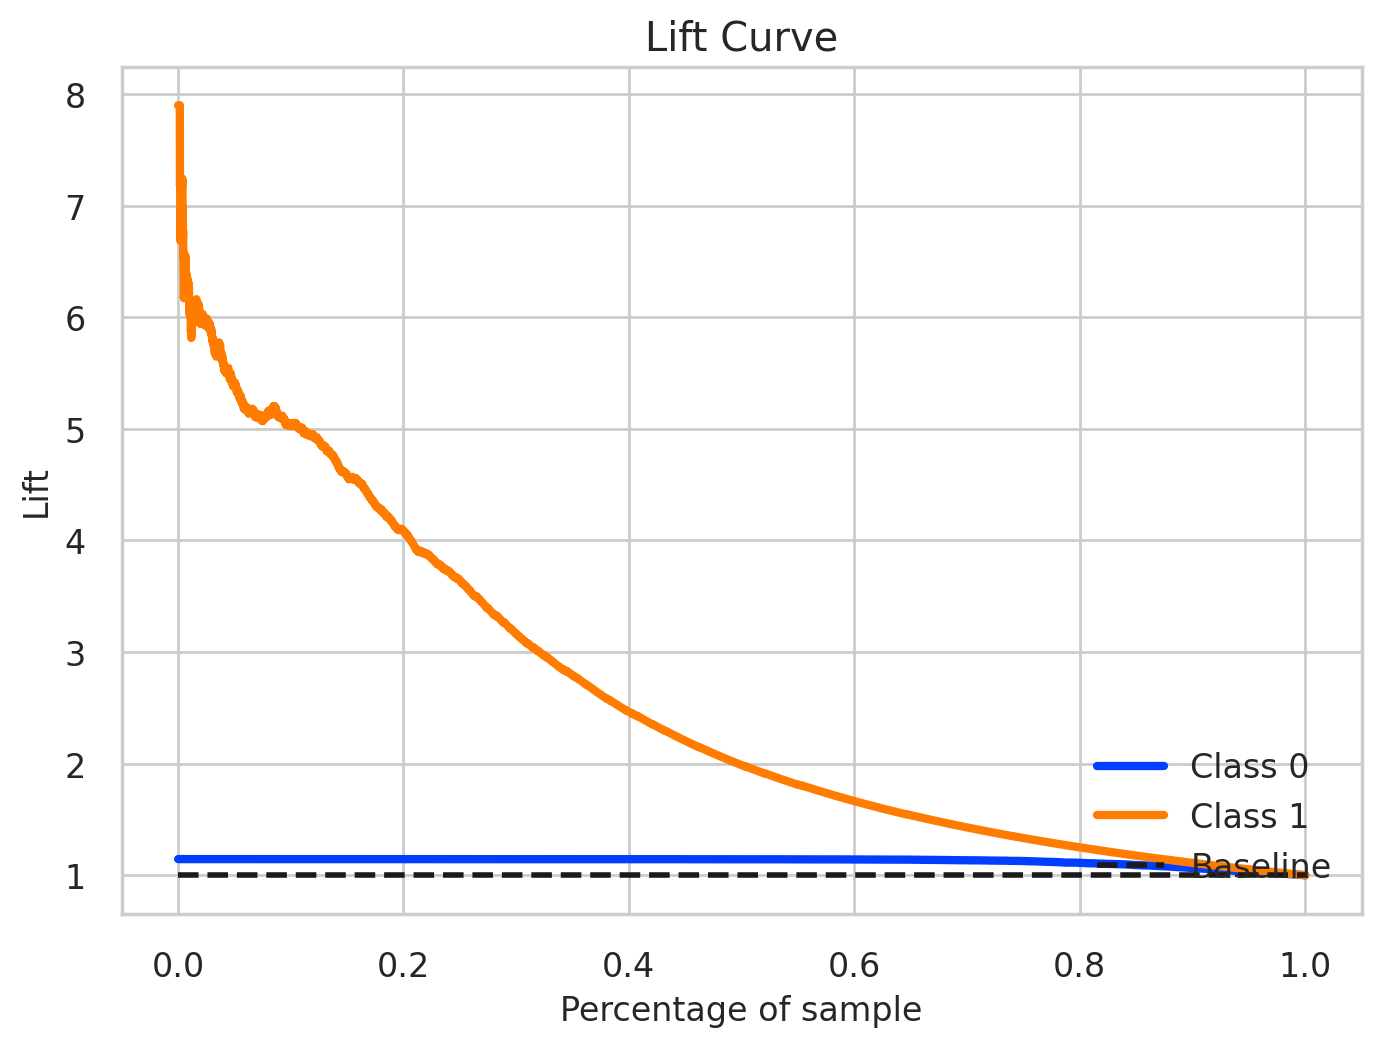

In [206]:
skplt.metrics.plot_lift_curve(y_test, xgb_pred_proba)

### Profit Curve

In [207]:
def standard_confusion_matrix(y_true, y_pred):
    '''
    Reformat confusion matrix output from sklearn for plotting profit curve.
    '''
    [[tn, fp], [fn, tp]] = metrics.confusion_matrix(y_true, y_pred)
    return np.array([[tp, fp], [fn, tn]])

def plot_profit_curve(model_object, costbenefit_mat, y_proba, y_test):
    '''
    Plot profit curve.

    INPUTS:
    - model object
    - cost benefit matrix in the same format as the confusion matrix above
    - predicted probabilities
    - actual labels
    '''

    # Profit curve data
    profits = [] # one profit value for each T (threshold)
    thresholds = sorted(y_proba, reverse=True)

    # For each threshold, calculate profit - starting with largest threshold
    for T in thresholds:
        y_pred = (y_proba > T).astype(int)
        confusion_mat = metrics.confusion_matrix(y_test, y_pred)
        # Calculate total profit for this threshold
        profit = sum(sum(confusion_mat * costbenefit_mat)) / len(y_test)
        profits.append(profit)

    print(profits)
    # Profit curve plot
    model_name = model_object.__class__.__name__
    max_profit = max(profits)
    plt.plot(np.linspace(0, 1, len(y_test)), profits, label = '{}, max profit ${:.2f} per user'.format(model_name, max_profit))


In [208]:
# create cost benefit matrix
costbenefit_mat = np.array([[0, -10000],
                            [0, 30000 - 10000]])

In [209]:
# check cost benefit matrix
costbenefit_mat

array([[     0, -10000],
       [     0,  20000]])

In [210]:
# check model confusion matrix
metrics.confusion_matrix(y_test, xgb_pred)

array([[5071,  255],
       [ 338,  434]])

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# define XGBoost classifier
xgb_classifier = xgb.XGBClassifier()

# xgb_params
xgb_params = {
    'n_estimators': [10, 50, 100],
    'max_depth': [3, 5, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.5, 0.8, 1],
    'colsample_bytree': [0.5, 0.8, 1],
    'gamma': [0, 0.1, 0.3],
    'objective': ['binary:logistic']
}

# define model with GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_classifier,
    param_grid=xgb_params,
    n_jobs=1,
    verbose=1,
    cv=5,
    scoring="f1"
)

# fitting gridsearch
grid_search.fit(X_train, y_train)

# check the best estimator
print(grid_search.best_estimator_)

Fitting 5 folds for each of 729 candidates, totalling 3645 fits


In [ ]:
# assign the best estimator to new variable
tree_best = grid_search.best_estimator_

In [ ]:
plot_profit_curve(tree_best,costbenefit_mat, xgb_pred_proba[:,1], y_test)
plt.xlabel('Percentage of test instances (decreasing by score)')
plt.ylabel('Profit')
plt.title('Profit Curves')
plt.legend(loc='lower left')
plt.show()